## IMDB DATA

What´s the most popular films os Science-Fiction in the IMDB site? Which films have the best user ratings? Is there a difference between user and critic ratings? Which directors and production companies have the best reviews? Which genres have the most volatile ratings? These are some of the questions that will be analyzed here with data taken from IMDB.


IMDB is the largestst online database of information about films, TV series, podcasts, video games, and streaming content. Founded in the 1990s and now a subsidiary of Amazon, the site offers details on cast, crew, plots, trivia, trailers, reviews, and opinions from a global community of fans, who can also create their own lists of favorite titles.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# csv files path

imdb_data_path = 'C:/Users/KAWAN/Desktop/aulas_python_pimes/imdb_data.xlsx'
runtime_path = 'C:/Users/KAWAN/Desktop/aulas_python_pimes/runtime.xlsx'

# pickle files path

imdb_data_pkl_path = 'C:/Users/KAWAN/Desktop/aulas_python_pimes/imdb_data.pkl'
runtime__pkl_path = 'C:/Users/KAWAN/Desktop/aulas_python_pimes/runtime.pkl'

In [17]:
imdb_data = pd.read_excel(imdb_data_path)
runtime_data = pd.read_excel(runtime_path)

#### IMDB movies data

In [19]:
display(imdb_data)

,Name,Year,User Rating,Critic Rating,Genres,Duration,Age Rating,Popularity,Director,Production Companies
0,Superman,2025.0,7.4,68.0,"Adventure Epic, Globetrotting Adventure, Sci-F...",Cast & crew,PG-13,236000.0,James Gunn,"['DC Studios', 'Domain Entertainment (II)', 'T..."
1,Jurassic World: Rebirth,2025.0,6.0,50.0,"Dinosaur Adventure, Action, Adventure, Sci-Fi,...",Cast & crew,PG-13,112000.0,Gareth Edwards,"['Universal Pictures', 'Amblin Entertainment',..."
2,War of the Worlds,2025.0,2.6,6.0,"Alien Invasion, Horror, Sci-Fi, Thriller",Cast & crew,PG-13,23000.0,Rich Lee,"['Universal Pictures', 'Bazelevs Entertainment..."
3,The Life of Chuck,2024.0,7.4,67.0,"Drama, Fantasy, Sci-Fi",Cast & crew,R,22000.0,Mike Flanagan,"['Neon', 'Intrepid Pictures', 'Red Room Pictur..."
4,Descendent,2025.0,4.9,NaN,"Drama, Horror, Mystery, Sci-Fi, Thriller",Cast & crew,NaN,588.0,Peter Cilella,['Rustic Films']
...,...,...,...,...,...,...,...,...,...,...
3794,The Dead Link,2002.0,7.2,NaN,Sci-Fi,Cast & crew,NaN,58.0,Ben Juhl,['Twilightshow Entertainment']
3795,Uchuujin from Outer Space,2007.0,5.5,NaN,"Sitcom, Comedy, Sci-Fi",Cast & crew,NaN,85.0,Danny Mann Jr.,"[""Don't Give A Damn Productions"", 'Troma Enter..."
3796,The Complex,2012.0,5.5,NaN,"Comedy, Horror, Sci-Fi",Cast & crew,NaN,57.0,Josh Spiegel,NaN
3797,Epitaph: Bread and Salt,2013.0,4.4,NaN,"Action, Horror, Sci-Fi",Cast & crew,NaN,81.0,Nathyn Masters,['TimeCode Mechanics']


In [21]:
# repeated lines in IMDB data?

duplic = imdb_data.value_counts()
duplic = duplic[duplic > 1]  
duplic_titles = duplic.index.tolist()

print(len(duplic_titles))

0


In [23]:
# repeated titles?

duplic_ = imdb_data['Name'].value_counts()
duplic_ = duplic_[duplic_ > 1]  
duplic_titles = duplic_.index.tolist()

print(duplic_titles)
print(len(duplic_titles))

['Dr. Jekyll and Mr. Hyde', 'Superman', 'Frankenstein', 'Journey to the Center of the Earth', 'Mars', 'The Avengers', 'The Whisperer in Darkness', 'The Arrival', 'Meteor', 'End of the World', 'Captain America', 'Blake of Scotland Yard', 'The Hive', 'Firestarter', "It's Alive", 'Black Friday', 'Project X', 'Alien Predator', 'The Sighting', 'The Lost World', 'Chrysalis', 'Flatliners', 'Prism', 'The Thing', 'Savage', 'The Survivalist', 'Hellboy', 'Ghostbusters', 'The Time Machine', 'Buck Rogers', 'Paradox', 'Parallel', 'Air', 'RoboCop', 'Alien Abduction', 'Oblivion', '20,000 Leagues Under the Sea', 'Invasion of the Body Snatchers', 'Pandemic', 'Mortal Kombat', 'Interface', 'Not of This Earth', 'The Silencers', 'The Stepford Wives', 'Mysterious Island', 'The Black Hole', 'Invaders from Mars', 'The Day the Earth Stood Still', 'Unidentified', 'The Invisible Man', 'Planet of the Apes', 'Death House', 'Lilo & Stitch', 'The Nutty Professor', 'Spiders', "The Brain That Wouldn't Die", 'The Fly', 

There are 75 titles repeated

In [25]:
# why exist repeated titles? example with 'Superman' movie. I checked for others repeated titles.

superman = imdb_data[imdb_data['Name']=='Superman']
display(superman)

# different 'Superman' movies - the 2025, 1973 and 1948 movies - has the same title in the dataframe

,Name,Year,User Rating,Critic Rating,Genres,Duration,Age Rating,Popularity,Director,Production Companies
0,Superman,2025.0,7.4,68.0,"Adventure Epic, Globetrotting Adventure, Sci-F...",Cast & crew,PG-13,236000.0,James Gunn,"['DC Studios', 'Domain Entertainment (II)', 'T..."
1269,Superman,1948.0,6.7,NaN,"Superhero, Action, Sci-Fi",Cast & crew,Approved,1.3,Spencer Gordon Bennet,['Sam Katzman Productions']
2486,Superman,1973.0,6.4,NaN,"Superhero, Action, Adventure, Sci-Fi",Cast & crew,NaN,224.0,Robert Leslie Bellem,['Warner Bros.']


In [27]:
# rename the column 'Name'

imdb_data = imdb_data.rename(columns = {'Name':'title'})
imdb_data.columns

Index(['title', 'Year', 'User Rating', 'Critic Rating', 'Genres', 'Duration',
       'Age Rating', 'Popularity', 'Director', 'Production Companies'],
      dtype='object')

In [29]:
# whats the line of 'Pandemic' movie? both films has the same duration, what may induce confusion.

pandemic_line = imdb_data[imdb_data['title'] =='Pandemic']
display(pandemic_line)

# there are two different movies

,title,Year,User Rating,Critic Rating,Genres,Duration,Age Rating,Popularity,Director,Production Companies
1345,Pandemic,2016.0,4.4,47.0,"B-Action, B-Horror, Action, Horror, Sci-Fi, Th...",Cast & crew,TV-MA,8.7,John Suits,"['New Artists Alliance', 'Tadross Media Group'..."
2118,Pandemic,2009.0,3.4,NaN,"Conspiracy Thriller, Drama, Sci-Fi, Thriller",Cast & crew,R,918.0,Jason Connery,"['Alianza Films International', 'Hollywood Pho..."


In [31]:
imdb_data.dtypes

title                    object
Year                    float64
User Rating             float64
Critic Rating           float64
Genres                   object
Duration                 object
Age Rating               object
Popularity              float64
Director                 object
Production Companies     object
dtype: object

In [33]:
# year as integer

imdb_data["Year"] = imdb_data["Year"].astype("Int64")   

In [35]:
imdb_data.dtypes

title                    object
Year                      Int64
User Rating             float64
Critic Rating           float64
Genres                   object
Duration                 object
Age Rating               object
Popularity              float64
Director                 object
Production Companies     object
dtype: object

In [39]:
imdb_data.head(5)

,title,Year,User Rating,Critic Rating,Genres,Duration,Age Rating,Popularity,Director,Production Companies
0,Superman,2025,7.4,68.0,"Adventure Epic, Globetrotting Adventure, Sci-F...",Cast & crew,PG-13,236000.0,James Gunn,"['DC Studios', 'Domain Entertainment (II)', 'T..."
1,Jurassic World: Rebirth,2025,6.0,50.0,"Dinosaur Adventure, Action, Adventure, Sci-Fi,...",Cast & crew,PG-13,112000.0,Gareth Edwards,"['Universal Pictures', 'Amblin Entertainment',..."
2,War of the Worlds,2025,2.6,6.0,"Alien Invasion, Horror, Sci-Fi, Thriller",Cast & crew,PG-13,23000.0,Rich Lee,"['Universal Pictures', 'Bazelevs Entertainment..."
3,The Life of Chuck,2024,7.4,67.0,"Drama, Fantasy, Sci-Fi",Cast & crew,R,22000.0,Mike Flanagan,"['Neon', 'Intrepid Pictures', 'Red Room Pictur..."
4,Descendent,2025,4.9,NaN,"Drama, Horror, Mystery, Sci-Fi, Thriller",Cast & crew,NaN,588.0,Peter Cilella,['Rustic Films']


In [41]:
# i will create a new column with all the titles, but the repeated titles will be followed by the year. Its a way to distinguish between movies with
# the same title.

imdb_data1 = imdb_data.copy()
counts = imdb_data1["title"].value_counts(dropna=False)

def adjust_title(row):
    title = row["title"]
    year = row["Year"]
    if pd.isna(title):   # if has no title, keep as NaN
        return title
    if counts[title] > 1:
        return f"{title} {int(year)}" if pd.notna(year) else title
    else:
        return title

imdb_data1["title_adjusted"] = imdb_data1.apply(adjust_title, axis=1)

In [43]:
# reordering the columns

imdb_data1 = imdb_data1[['title','Year','title_adjusted','User Rating','Critic Rating','Genres','Duration','Age Rating','Popularity','Director','Production Companies']]
display(imdb_data1)

,title,Year,title_adjusted,User Rating,Critic Rating,Genres,Duration,Age Rating,Popularity,Director,Production Companies
0,Superman,2025,Superman 2025,7.4,68.0,"Adventure Epic, Globetrotting Adventure, Sci-F...",Cast & crew,PG-13,236000.0,James Gunn,"['DC Studios', 'Domain Entertainment (II)', 'T..."
1,Jurassic World: Rebirth,2025,Jurassic World: Rebirth,6.0,50.0,"Dinosaur Adventure, Action, Adventure, Sci-Fi,...",Cast & crew,PG-13,112000.0,Gareth Edwards,"['Universal Pictures', 'Amblin Entertainment',..."
2,War of the Worlds,2025,War of the Worlds 2025,2.6,6.0,"Alien Invasion, Horror, Sci-Fi, Thriller",Cast & crew,PG-13,23000.0,Rich Lee,"['Universal Pictures', 'Bazelevs Entertainment..."
3,The Life of Chuck,2024,The Life of Chuck,7.4,67.0,"Drama, Fantasy, Sci-Fi",Cast & crew,R,22000.0,Mike Flanagan,"['Neon', 'Intrepid Pictures', 'Red Room Pictur..."
4,Descendent,2025,Descendent,4.9,NaN,"Drama, Horror, Mystery, Sci-Fi, Thriller",Cast & crew,NaN,588.0,Peter Cilella,['Rustic Films']
...,...,...,...,...,...,...,...,...,...,...,...
3794,The Dead Link,2002,The Dead Link,7.2,NaN,Sci-Fi,Cast & crew,NaN,58.0,Ben Juhl,['Twilightshow Entertainment']
3795,Uchuujin from Outer Space,2007,Uchuujin from Outer Space,5.5,NaN,"Sitcom, Comedy, Sci-Fi",Cast & crew,NaN,85.0,Danny Mann Jr.,"[""Don't Give A Damn Productions"", 'Troma Enter..."
3796,The Complex,2012,The Complex,5.5,NaN,"Comedy, Horror, Sci-Fi",Cast & crew,NaN,57.0,Josh Spiegel,NaN
3797,Epitaph: Bread and Salt,2013,Epitaph: Bread and Salt,4.4,NaN,"Action, Horror, Sci-Fi",Cast & crew,NaN,81.0,Nathyn Masters,['TimeCode Mechanics']


In [45]:
# keep having repeated titles?

duplic__ = imdb_data1['title_adjusted'].value_counts()
duplic__ = duplic__[duplic__ > 1]  
duplic_titles_ = duplic__.index.tolist()

print(duplic_titles_)
print(len(duplic_titles_))

['Blake of Scotland Yard 1937', 'Paradox 2016']
2


In [47]:
blackofscot = imdb_data1[imdb_data1['title_adjusted'] =='Blake of Scotland Yard 1937']
paradox = imdb_data1[imdb_data1['title_adjusted'] =='Paradox 2016']
display(blackofscot, paradox)

,title,Year,title_adjusted,User Rating,Critic Rating,Genres,Duration,Age Rating,Popularity,Director,Production Companies
3137,Blake of Scotland Yard,1937,Blake of Scotland Yard 1937,5.0,NaN,"Adventure, Crime, Sci-Fi",Cast & crew,Approved,211.0,Robert F. Hill,['Victory Pictures Corporation']
3661,Blake of Scotland Yard,1937,Blake of Scotland Yard 1937,3.3,NaN,"Crime, Sci-Fi",Cast & crew,Approved,140.0,Robert F. Hill,['Victory Pictures Corporation']


,title,Year,title_adjusted,User Rating,Critic Rating,Genres,Duration,Age Rating,Popularity,Director,Production Companies
2086,Paradox,2016,Paradox 2016,4.6,NaN,"Action, Drama, Sci-Fi",Cast & crew,TV-MA,3.4,Michael Hurst,"['Benattar/Thomas Productions', 'Parkside Pict..."
2923,Paradox,2016,Paradox 2016,6.1,NaN,"Drama, Romance, Sci-Fi, Thriller",Cast & crew,NaN,164.0,Stevo Chang,['Organized Chaos Films']


There is two different **Paradox** film in 2016. I will exclude **Blake of Scotland Yard**.

In [49]:
imdb_data1 = imdb_data1.drop([3137, 3661])
imdb_data1 = imdb_data1.reset_index(drop=True)     # reset index
display(imdb_data1)

,title,Year,title_adjusted,User Rating,Critic Rating,Genres,Duration,Age Rating,Popularity,Director,Production Companies
0,Superman,2025,Superman 2025,7.4,68.0,"Adventure Epic, Globetrotting Adventure, Sci-F...",Cast & crew,PG-13,236000.0,James Gunn,"['DC Studios', 'Domain Entertainment (II)', 'T..."
1,Jurassic World: Rebirth,2025,Jurassic World: Rebirth,6.0,50.0,"Dinosaur Adventure, Action, Adventure, Sci-Fi,...",Cast & crew,PG-13,112000.0,Gareth Edwards,"['Universal Pictures', 'Amblin Entertainment',..."
2,War of the Worlds,2025,War of the Worlds 2025,2.6,6.0,"Alien Invasion, Horror, Sci-Fi, Thriller",Cast & crew,PG-13,23000.0,Rich Lee,"['Universal Pictures', 'Bazelevs Entertainment..."
3,The Life of Chuck,2024,The Life of Chuck,7.4,67.0,"Drama, Fantasy, Sci-Fi",Cast & crew,R,22000.0,Mike Flanagan,"['Neon', 'Intrepid Pictures', 'Red Room Pictur..."
4,Descendent,2025,Descendent,4.9,NaN,"Drama, Horror, Mystery, Sci-Fi, Thriller",Cast & crew,NaN,588.0,Peter Cilella,['Rustic Films']
...,...,...,...,...,...,...,...,...,...,...,...
3792,The Dead Link,2002,The Dead Link,7.2,NaN,Sci-Fi,Cast & crew,NaN,58.0,Ben Juhl,['Twilightshow Entertainment']
3793,Uchuujin from Outer Space,2007,Uchuujin from Outer Space,5.5,NaN,"Sitcom, Comedy, Sci-Fi",Cast & crew,NaN,85.0,Danny Mann Jr.,"[""Don't Give A Damn Productions"", 'Troma Enter..."
3794,The Complex,2012,The Complex,5.5,NaN,"Comedy, Horror, Sci-Fi",Cast & crew,NaN,57.0,Josh Spiegel,NaN
3795,Epitaph: Bread and Salt,2013,Epitaph: Bread and Salt,4.4,NaN,"Action, Horror, Sci-Fi",Cast & crew,NaN,81.0,Nathyn Masters,['TimeCode Mechanics']


#### Top 10 mean popularity by Director

In [51]:
# top 10 populars (by the sum of popularity)
top10 = (                                                 
    imdb_data1.groupby("Director")["Popularity"]
    .sum()
    .nlargest(10)
    .index)

stats = ['count', 'mean', 'min', 'max']
top10_directors = (
    imdb_data1[imdb_data1["Director"].isin(top10)]
    .groupby("Director")["Popularity"]
    .agg(stats).round()
    .sort_values("mean", ascending=False)
)


display(top10_directors)

,count,mean,min,max
Director,,,,
Denis Villeneuve,4,796750.0,659000.0,973000.0
Jon Watts,3,783667.0,610000.0,972000.0
J.J. Abrams,5,608000.0,376000.0,1000000.0
Sam Raimi,5,593800.0,73000.0,936000.0
Francis Lawrence,5,542200.0,168000.0,858000.0
George Lucas,5,531200.0,2.0,903000.0
Zack Snyder,8,448000.0,61000.0,850000.0
Michael Bay,7,417714.0,180000.0,703000.0
Steven Spielberg,9,346055.0,1.0,608000.0


#### Runtime Data

In [53]:
display(runtime_data)

,title,duration
0,Superman,129.0
1,Jurassic World: Rebirth,133.0
2,War of the Worlds,91.0
3,The Life of Chuck,111.0
4,Descendent,96.0
...,...,...
3797,The Dead Link,85.0
3798,Uchuujin from Outer Space,165.0
3799,The Complex,93.0
3800,Epitaph: Bread and Salt,90.0


In [55]:
# repeated lines?

dup_runtime = runtime_data.value_counts()
dup_runtime = dup_runtime[dup_runtime > 1]  
dup_runtime_titles = dup_runtime.index.tolist()

print(dup_runtime_titles)
print(len(dup_runtime_titles))

[('Pandemic', 91.0)]
1


In [57]:
# duplicated titles?

duplic_runtime = runtime_data['title'].value_counts()
duplic_runtime = duplic_runtime[duplic_runtime > 1]  
duplic_runtime_titles = duplic_runtime.index.tolist()

print(duplic_runtime_titles)
print(len(duplic_runtime_titles))

['Dr. Jekyll and Mr. Hyde', 'Superman', 'Frankenstein', 'Journey to the Center of the Earth', 'Prism', 'The Avengers', 'The Whisperer in Darkness', 'The Arrival', 'Meteor', 'End of the World', 'Captain America', 'Blake of Scotland Yard', 'The Hive', 'Firestarter', 'Black Friday', "It's Alive", 'Project X', 'Alien Predator', 'Chrysalis', 'The Lost World', 'The Sighting', 'Mars', 'Flatliners', 'The Thing', 'Savage', 'The Survivalist', 'The Day the Earth Stood Still', 'Ghostbusters', 'The Time Machine', 'Paradox', 'Buck Rogers', 'Parallel', 'Air', 'RoboCop', 'Alien Abduction', 'Oblivion', '20,000 Leagues Under the Sea', 'Pandemic', 'Invasion of the Body Snatchers', 'Mortal Kombat', 'Interface', 'The Silencers', 'Not of This Earth', 'Mysterious Island', 'The Stepford Wives', 'The Black Hole', 'Invaders from Mars', 'Hellboy', 'Unidentified', 'The Invisible Man', 'Muse', 'Planet of the Apes', 'Spiders', "The Brain That Wouldn't Die", 'Death House', 'Stasis', 'The Toxic Avenger', 'The Island 

In [59]:
superman_ = runtime_data[runtime_data['title']=='Superman']
display(superman_)

,title,duration
0,Superman,129.0
1271,Superman,244.0
2488,Superman,104.0


**imdb_data** has 3798 titles

**runtime_data** has 3801 titles

2 titles more

In [61]:
# titles in runtime_data that aren´t in imdb_data   
missing_title = runtime_data[~runtime_data['title'].isin(imdb_data1['title'])]
unique_miss = missing_title['title'].unique()

print(unique_miss)

['Jimmy and Stiggs' 'Afterburn' 'Hollywood Warrioress: The Movie'
 'Andromeda 3' 'Kamillions' 'Chrome Angels' 'Blake of Scotland Yard']


In [63]:
# titles in imdb_data that aren´t in runtime_data   
missing_title1 = imdb_data1[~imdb_data1['title'].isin(runtime_data['title'])]
unique_miss1 = missing_title1['title'].unique()

print(unique_miss1)

[nan]


In [65]:
# I will drop the movies in runtime that aren´t in the IMDB data because i dont have more information about them more than the title.

to_drop = ['Jimmy and Stiggs','Afterburn','Hollywood Warrioress: The Movie', 'Andromeda 3','Kamillions','Chrome Angels','Blake of Scotland Yard']

runtime1 = runtime_data.copy()
rows_to_drop = runtime1[runtime1['title'].isin(to_drop)].index
runtime1 = runtime1.drop(rows_to_drop).reset_index(drop=True)
display(runtime1)

,title,duration
0,Superman,129.0
1,Jurassic World: Rebirth,133.0
2,War of the Worlds,91.0
3,The Life of Chuck,111.0
4,Descendent,96.0
...,...,...
3789,The Dead Link,85.0
3790,Uchuujin from Outer Space,165.0
3791,The Complex,93.0
3792,Epitaph: Bread and Salt,90.0


In [67]:
# the titles in imdb_data1 the arent in runtime1

comp = imdb_data1[~imdb_data1['title'].isin(runtime1['title'])]
comp_miss1 = comp['title'].unique()

print(comp_miss1)

[nan]


In [69]:
# rename the column title to merge

runtime1 = runtime1.rename(columns={'title':'title_adjusted'})
runtime1.columns

Index(['title_adjusted', 'duration'], dtype='object')

#### Missing values

In [71]:
imdb_data1[imdb_data1.isna().all(axis=1)]

,title,Year,title_adjusted,User Rating,Critic Rating,Genres,Duration,Age Rating,Popularity,Director,Production Companies
2987,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2988,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2994,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
runtime1[runtime1.isna().all(axis=1)].sum()

title_adjusted      0
duration          0.0
dtype: object

In [75]:
imdb_data1 = imdb_data1.dropna(how='all')
len(imdb_data1)

3794

In [77]:
len(runtime1)

3794

Now, both dataframe has the same dimension

In [79]:
# ordering by alphabetical order

imdb_data1 = imdb_data1.sort_values('title').reset_index(drop=True)
runtime1 = runtime1.sort_values('title_adjusted').reset_index(drop=True)

In [81]:
imdb_data1.head(10)

,title,Year,title_adjusted,User Rating,Critic Rating,Genres,Duration,Age Rating,Popularity,Director,Production Companies
0,*batteries not included,1987,*batteries not included,6.6,54.0,"Comedy, Family, Fantasy, Sci-Fi",Cast & crew,PG,39000.0,Matthew Robbins,"['Universal Pictures', 'Amblin Entertainment']"
1,+1,2013,+1,5.5,60.0,"Horror, Sci-Fi, Thriller",Cast & crew,Not Rated,8.7,Dennis Iliadis,"['Process Films', 'Process Media']"
2,.com for Murder,2002,.com for Murder,2.7,NaN,"Horror, Sci-Fi, Thriller",Cast & crew,Unrated,5.1,Nico Mastorakis,['Omega Entertainment']
3,"1,001 Ways to Enjoy the Missionary Position",2010,"1,001 Ways to Enjoy the Missionary Position",4.4,NaN,"Comedy, Drama, Sci-Fi",Cast & crew,NaN,128.0,Alan Chu,"['1,001 Ways Productions']"
4,10 Cloverfield Lane,2016,10 Cloverfield Lane,7.2,76.0,"Psychological Horror, Psychological Thriller, ...",Cast & crew,PG-13,375000.0,Dan Trachtenberg,"['Paramount Pictures', 'Bad Robot', 'Spectrum ..."
5,"10,000 Days",2014,"10,000 Days",2.7,NaN,Sci-Fi,Cast & crew,TV-PG,885.0,Eric Small,['Bahr Productions Inc.']
6,10.0 Earthquake,2014,10.0 Earthquake,3.5,NaN,"Disaster, Action, Adventure, Drama, Sci-Fi, Th...",Cast & crew,NaN,2.9,David Gidali,['Indy Entertainment']
7,11 Minutes Ago,2007,11 Minutes Ago,6.3,NaN,"Romance, Sci-Fi",Cast & crew,Not Rated,445.0,Bob Gebert,['Fly High Films']
8,11:59,2005,11:59,5.8,NaN,"Mystery, Sci-Fi, Thriller",Cast & crew,NaN,483.0,Jamin Winans,['Double Edge Films']
9,12 Monkeys,1995,12 Monkeys,8.0,75.0,"Cyberpunk, Dystopian Sci-Fi, Psychological Thr...",Cast & crew,R,668000.0,Terry Gilliam,"['Universal Pictures', 'Atlas Entertainment', ..."


In [83]:
runtime1.head(10)

,title_adjusted,duration
0,*batteries not included,107.0
1,+1,96.0
2,.com for Murder,96.0
3,"1,001 Ways to Enjoy the Missionary Position",83.0
4,10 Cloverfield Lane,103.0
5,"10,000 Days",91.0
6,10.0 Earthquake,88.0
7,11 Minutes Ago,83.0
8,11:59,102.0
9,12 Monkeys,129.0


In [85]:
# Compare value by value  to see if the titles in imdb_data are equal the titles in runtime
compare = imdb_data1['title'] == runtime1['title_adjusted']

print(f"equal values (total sum): {compare.sum()} de {len(compare)}")
print(f"different values (total sum): {compare.isna().sum() if compare.isna().any() else (~compare).sum()}")

# if differente, where?
diff = compare[~compare]
if not diff.empty:
    print("\nindex with difference values:")
    for idx in diff.index:
        print(f"index {idx}: '{imdb_data1.loc[idx, 'title']}' != '{runtime1.loc[idx, 'title_adjusted']}'")

equal values (total sum): 3794 de 3794
different values (total sum): 0


### Merge

In [87]:
imdb_finaldt = pd.merge(imdb_data1, runtime1, left_index=True, right_index=True, how='inner')
display(imdb_finaldt)

,title,Year,title_adjusted_x,User Rating,Critic Rating,Genres,Duration,Age Rating,Popularity,Director,Production Companies,title_adjusted_y,duration
0,*batteries not included,1987,*batteries not included,6.6,54.0,"Comedy, Family, Fantasy, Sci-Fi",Cast & crew,PG,39000.0,Matthew Robbins,"['Universal Pictures', 'Amblin Entertainment']",*batteries not included,107.0
1,+1,2013,+1,5.5,60.0,"Horror, Sci-Fi, Thriller",Cast & crew,Not Rated,8.7,Dennis Iliadis,"['Process Films', 'Process Media']",+1,96.0
2,.com for Murder,2002,.com for Murder,2.7,NaN,"Horror, Sci-Fi, Thriller",Cast & crew,Unrated,5.1,Nico Mastorakis,['Omega Entertainment'],.com for Murder,96.0
3,"1,001 Ways to Enjoy the Missionary Position",2010,"1,001 Ways to Enjoy the Missionary Position",4.4,NaN,"Comedy, Drama, Sci-Fi",Cast & crew,NaN,128.0,Alan Chu,"['1,001 Ways Productions']","1,001 Ways to Enjoy the Missionary Position",83.0
4,10 Cloverfield Lane,2016,10 Cloverfield Lane,7.2,76.0,"Psychological Horror, Psychological Thriller, ...",Cast & crew,PG-13,375000.0,Dan Trachtenberg,"['Paramount Pictures', 'Bad Robot', 'Spectrum ...",10 Cloverfield Lane,103.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3789,Zéro un,2003,Zéro un,5.5,NaN,"Animation, Comedy, Drama, Sci-Fi, War",Cast & crew,NaN,62.0,Jeanne Biras,['EuropaCorp'],Zéro un,85.0
3790,iGirlfriend,2016,iGirlfriend,2.9,NaN,"Teen Comedy, Comedy, Sci-Fi, Thriller",Cast & crew,Not Rated,361.0,Scott Coones,['Shoestring Film Cooperative'],iGirlfriend,85.0
3791,www.RachelOrmont.com,2024,www.RachelOrmont.com,5.4,NaN,"Drama, Sci-Fi",Cast & crew,NaN,66.0,Peter Vack,"['Fast Rainbow Films', 'Gummy Films', 'Simone ...",www.RachelOrmont.com,80.0
3792,xXx: State of the Union,2005,xXx: State of the Union,4.5,37.0,"Conspiracy Thriller, Political Thriller, Actio...",Cast & crew,PG-13,76000.0,Lee Tamahori,"['Revolution Studios', 'Original Film']",xXx: State of the Union,101.0


In [89]:
imdb_finaldt = imdb_finaldt.drop('title_adjusted_y', axis=1)            # drop this column 
imdb_finaldt = imdb_finaldt.rename(columns = {'title_adjusted_x':'titles'})
imdb_finaldt.head(2)

,title,Year,titles,User Rating,Critic Rating,Genres,Duration,Age Rating,Popularity,Director,Production Companies,duration
0,*batteries not included,1987,*batteries not included,6.6,54.0,"Comedy, Family, Fantasy, Sci-Fi",Cast & crew,PG,39000.0,Matthew Robbins,"['Universal Pictures', 'Amblin Entertainment']",107.0
1,+1,2013,+1,5.5,60.0,"Horror, Sci-Fi, Thriller",Cast & crew,Not Rated,8.7,Dennis Iliadis,"['Process Films', 'Process Media']",96.0


### Verification

Some verification to see if its merge is correct considering the duplicate titles.

In [91]:
superman_check = imdb_finaldt[imdb_finaldt['title']=='Superman']
superman_check

,title,Year,titles,User Rating,Critic Rating,Genres,Duration,Age Rating,Popularity,Director,Production Companies,duration
2724,Superman,2025,Superman 2025,7.4,68.0,"Adventure Epic, Globetrotting Adventure, Sci-F...",Cast & crew,PG-13,236000.0,James Gunn,"['DC Studios', 'Domain Entertainment (II)', 'T...",129.0
2725,Superman,1948,Superman 1948,6.7,NaN,"Superhero, Action, Sci-Fi",Cast & crew,Approved,1.3,Spencer Gordon Bennet,['Sam Katzman Productions'],244.0
2726,Superman,1973,Superman 1973,6.4,NaN,"Superhero, Action, Adventure, Sci-Fi",Cast & crew,NaN,224.0,Robert Leslie Bellem,['Warner Bros.'],104.0


It´s right!

In [93]:
jekyll_check = imdb_finaldt[imdb_finaldt['title']=='Dr. Jekyll and Mr. Hyde']
jekyll_check

,title,Year,titles,User Rating,Critic Rating,Genres,Duration,Age Rating,Popularity,Director,Production Companies,duration
940,Dr. Jekyll and Mr. Hyde,1941,Dr. Jekyll and Mr. Hyde 1941,6.8,NaN,"Drama, Horror, Sci-Fi, Thriller",Cast & crew,Approved,10000.0,Victor Fleming,"[""Loew's""]",113.0
941,Dr. Jekyll and Mr. Hyde,2017,Dr. Jekyll and Mr. Hyde 2017,5.7,NaN,"Horror, Sci-Fi",Cast & crew,NaN,537.0,B. Luciano Barsuglia,"['Koa Aloha Media', 'SoCal Entertainment and M...",83.0
942,Dr. Jekyll and Mr. Hyde,1931,Dr. Jekyll and Mr. Hyde 1931,7.6,88.0,"Body Horror, Supernatural Horror, Horror, Sci-Fi",Cast & crew,Approved,17000.0,Rouben Mamoulian,['Paramount Pictures'],98.0
943,Dr. Jekyll and Mr. Hyde,1920,Dr. Jekyll and Mr. Hyde 1920,6.9,NaN,"Drama, Horror, Sci-Fi",Cast & crew,Unrated,6.5,John S. Robertson,['Paramount Pictures'],69.0


It´s right!

### Genres

In [101]:
# frequncy of all combined genres
genre_combinations = imdb_finaldt['Genres'].value_counts()
display(genre_combinations.head(20))  # Top 20 

Genres
Sci-Fi                                 202
Horror, Sci-Fi                         194
Horror, Sci-Fi, Thriller               123
Action, Sci-Fi                         112
Comedy, Sci-Fi                          92
Sci-Fi, Thriller                        86
Drama, Sci-Fi                           76
Action, Sci-Fi, Thriller                64
Drama, Sci-Fi, Thriller                 60
Comedy, Horror, Sci-Fi                  53
Action, Horror, Sci-Fi                  46
Action, Adventure, Sci-Fi               44
Adventure, Sci-Fi                       25
Drama, Horror, Sci-Fi, Thriller         23
Action, Adventure, Sci-Fi, Thriller     22
Drama, Horror, Sci-Fi                   22
Horror, Mystery, Sci-Fi, Thriller       21
Drama, Mystery, Sci-Fi, Thriller        21
Horror, Mystery, Sci-Fi                 19
Drama, Mystery, Sci-Fi                  19
Name: count, dtype: int64

In [103]:
# extract all unique genres
all_gen = set()
for gen in imdb_finaldt['Genres'].dropna():
    for gen in gen.split(','):
        all_gen.add(gen.strip())
print(sorted(all_gen))
print(len(all_gen))

['Action', 'Action Epic', 'Adult Animation', 'Adventure', 'Adventure Epic', 'Alien Invasion', 'Animal Adventure', 'Animation', 'Anime', 'Artificial Intelligence', 'B-Action', 'B-Horror', 'Baseball', 'Basketball', 'Biography', 'Body Horror', 'Body Swap Comedy', 'Boxing', 'Buddy Comedy', 'Buddy Cop', 'Bumbling Detective', 'Caper', 'Car Action', 'Comedy', 'Coming-of-Age', 'Computer Animation', 'Conspiracy Thriller', 'Contemporary Western', 'Cop Drama', 'Cozy Mystery', 'Crime', 'Cyber Thriller', 'Cyberpunk', 'Dark Comedy', 'Dark Fantasy', 'Dark Romance', 'Desert Adventure', 'Dinosaur Adventure', 'Disaster', 'Docudrama', 'Drama', 'Drug Crime', 'Dystopian Sci-Fi', 'Epic', 'Erotic Thriller', 'Extreme Sport', 'Fairy Tale', 'Family', 'Fantasy', 'Fantasy Epic', 'Farce', 'Feel-Good Romance', 'Film Noir', 'Folk Horror', 'Found Footage Horror', 'Gangster', 'Globetrotting Adventure', 'Gun Fu', 'Hand-Drawn Animation', 'Heist', 'High-Concept Comedy', 'History', 'Holiday', 'Holiday Animation', 'Holiday

In [105]:
# frequency of each genres

from collections import Counter

count_gen = Counter()
for gen in imdb_finaldt['Genres'].dropna():
    gen_list = [g.strip() for g in gen.split(',')]
    count_gen.update(gen_list)

for gen, count in count_gen.most_common():
    print(f"{gen}: {count} films")

Sci-Fi: 3711 films
Horror: 1340 films
Action: 1318 films
Thriller: 1259 films
Comedy: 943 films
Adventure: 927 films
Drama: 870 films
Fantasy: 511 films
Mystery: 415 films
Family: 269 films
Superhero: 252 films
Romance: 241 films
Space Sci-Fi: 193 films
Crime: 176 films
Animation: 176 films
Dystopian Sci-Fi: 165 films
Alien Invasion: 157 films
Dark Comedy: 144 films
Body Horror: 141 films
Parody: 136 films
B-Horror: 135 films
Time Travel: 98 films
Monster Horror: 90 films
Supernatural Horror: 75 films
Slapstick: 75 films
Sci-Fi Epic: 73 films
Satire: 73 films
Artificial Intelligence: 70 films
Computer Animation: 69 films
Kaiju: 56 films
Urban Adventure: 54 films
Cyberpunk: 53 films
Psychological Thriller: 50 films
Action Epic: 47 films
Zombie Horror: 46 films
Dark Fantasy: 43 films
Quest: 43 films
Psychological Drama: 43 films
B-Action: 42 films
Musical: 42 films
Hand-Drawn Animation: 41 films
Dinosaur Adventure: 40 films
Adventure Epic: 39 films
Supernatural Fantasy: 38 films
Suspense

In [107]:
# a dummy for each genre

genres_dummies = imdb_finaldt['Genres'].str.get_dummies(sep=', ')

imdb_finaldt = pd.concat([imdb_finaldt, genres_dummies], axis=1)
print(imdb_finaldt.head())

                                         title  Year  \
0                      *batteries not included  1987   
1                                           +1  2013   
2                              .com for Murder  2002   
3  1,001 Ways to Enjoy the Missionary Position  2010   
4                          10 Cloverfield Lane  2016   

                                        titles  User Rating  Critic Rating  \
0                      *batteries not included          6.6           54.0   
1                                           +1          5.5           60.0   
2                              .com for Murder          2.7            NaN   
3  1,001 Ways to Enjoy the Missionary Position          4.4            NaN   
4                          10 Cloverfield Lane          7.2           76.0   

                                              Genres     Duration Age Rating  \
0                    Comedy, Family, Fantasy, Sci-Fi  Cast & crew         PG   
1                           Horror

In [109]:
for cols in imdb_finaldt:
    print(cols)

title
Year
titles
User Rating
Critic Rating
Genres
Duration
Age Rating
Popularity
Director
Production Companies
duration
Action
Action Epic
Adult Animation
Adventure
Adventure Epic
Alien Invasion
Animal Adventure
Animation
Anime
Artificial Intelligence
B-Action
B-Horror
Baseball
Basketball
Biography
Body Horror
Body Swap Comedy
Boxing
Buddy Comedy
Buddy Cop
Bumbling Detective
Caper
Car Action
Comedy
Coming-of-Age
Computer Animation
Conspiracy Thriller
Contemporary Western
Cop Drama
Cozy Mystery
Crime
Cyber Thriller
Cyberpunk
Dark Comedy
Dark Fantasy
Dark Romance
Desert Adventure
Dinosaur Adventure
Disaster
Docudrama
Drama
Drug Crime
Dystopian Sci-Fi
Epic
Erotic Thriller
Extreme Sport
Fairy Tale
Family
Fantasy
Fantasy Epic
Farce
Feel-Good Romance
Film Noir
Folk Horror
Found Footage Horror
Gangster
Globetrotting Adventure
Gun Fu
Hand-Drawn Animation
Heist
High-Concept Comedy
History
Holiday
Holiday Animation
Holiday Comedy
Horror
Jungle Adventure
Kaiju
Kung Fu
Legal Drama
Martial Arts
Me

### Production Companies

In [111]:
# frequncy of all combined production companies
prod_comp_combinations = imdb_finaldt['Production Companies'].value_counts()
display(prod_comp_combinations.head(40))       # top 30

Production Companies
['Universal Pictures']                                                   39
['Paramount Pictures']                                                   28
['Republic Pictures']                                                    23
['Sam Katzman Productions']                                              19
['Walt Disney Productions']                                              16
['Marvel Studios']                                                       15
['Polonia Brothers Entertainment']                                       15
['Universal International Pictures (UI)']                                14
['The Asylum', 'Acme Holding Company']                                   12
['Metro-Goldwyn-Mayer (MGM)']                                            11
['Full Moon Entertainment']                                              10
['Twentieth Century Fox']                                                 9
['Warner Bros.']                                                   

In [113]:
import ast

# Converter string to list
imdb_finaldt['Production Companies'] = imdb_finaldt['Production Companies'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

all_producers = imdb_finaldt['Production Companies'].explode()
unique_producers = all_producers.dropna().unique()                         # each production company individually
print(unique_producers)

producers_count = all_producers.value_counts()                             # count
print('In how much films each production company appears (just the 20 most):')
print(producers_count.head(20))      

['Universal Pictures' 'Amblin Entertainment' 'Process Films' ...
 'Shoestring Film Cooperative' 'Fast Rainbow Films' 'Simone Films']
In how much films each production company appears (just the 20 most):
Production Companies
Paramount Pictures           101
Universal Pictures            99
Warner Bros.                  90
Twentieth Century Fox         75
The Asylum                    69
Columbia Pictures             68
Walt Disney Pictures          39
New Line Cinema               36
Acme Holding Company          34
Metro-Goldwyn-Mayer (MGM)     34
Marvel Studios                34
Republic Pictures             31
DC Entertainment              28
Amblin Entertainment          25
Marvel Entertainment          24
Warner Bros. Animation        23
Sam Katzman Productions       20
Full Moon Entertainment       19
Lionsgate                     19
DreamWorks Pictures           18
Name: count, dtype: int64


In [115]:
print('Total numbers of Production Companies:')
print(len(unique_producers))

Total numbers of Production Companies:
4045


In [119]:
import ast
from sklearn.preprocessing import MultiLabelBinarizer

# Convert strings to lists, if necessary
imdb_finaldt['Production Companies'] = imdb_finaldt['Production Companies'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

# change NaN for empty list
imdb_finaldt['Production Companies'] = imdb_finaldt['Production Companies'].apply(
    lambda x: x if isinstance(x, list) else []
)

# create dummies
mlb = MultiLabelBinarizer()
prod_dummies = pd.DataFrame(
    mlb.fit_transform(imdb_finaldt['Production Companies']),
    columns=mlb.classes_,
    index=imdb_finaldt.index
)

imdb_finaldt = pd.concat([imdb_finaldt, prod_dummies], axis=1)
print(imdb_finaldt.head())

                                         title  Year  \
0                      *batteries not included  1987   
1                                           +1  2013   
2                              .com for Murder  2002   
3  1,001 Ways to Enjoy the Missionary Position  2010   
4                          10 Cloverfield Lane  2016   

                                        titles  User Rating  Critic Rating  \
0                      *batteries not included          6.6           54.0   
1                                           +1          5.5           60.0   
2                              .com for Murder          2.7            NaN   
3  1,001 Ways to Enjoy the Missionary Position          4.4            NaN   
4                          10 Cloverfield Lane          7.2           76.0   

                                              Genres     Duration Age Rating  \
0                    Comedy, Family, Fantasy, Sci-Fi  Cast & crew         PG   
1                           Horror

In [121]:
display(imdb_finaldt[['Production Companies', 'Genres', 'Horror', 'Sci-Fi', 'Universal Pictures', 'Paramount Pictures']].head(20))

,Production Companies,Genres,Horror,Sci-Fi,Universal Pictures,Universal Pictures,Paramount Pictures,Paramount Pictures
0,"[Universal Pictures, Amblin Entertainment]","Comedy, Family, Fantasy, Sci-Fi",0,1,1,1,0,0
1,"[Process Films, Process Media]","Horror, Sci-Fi, Thriller",1,1,0,0,0,0
2,[Omega Entertainment],"Horror, Sci-Fi, Thriller",1,1,0,0,0,0
3,"[1,001 Ways Productions]","Comedy, Drama, Sci-Fi",0,1,0,0,0,0
4,"[Paramount Pictures, Bad Robot, Spectrum Effects]","Psychological Horror, Psychological Thriller, ...",1,1,0,0,1,1
5,[Bahr Productions Inc.],Sci-Fi,0,1,0,0,0,0
6,[Indy Entertainment],"Disaster, Action, Adventure, Drama, Sci-Fi, Th...",0,1,0,0,0,0
7,[Fly High Films],"Romance, Sci-Fi",0,1,0,0,0,0
8,[Double Edge Films],"Mystery, Sci-Fi, Thriller",0,1,0,0,0,0
9,"[Universal Pictures, Atlas Entertainment, Clas...","Cyberpunk, Dystopian Sci-Fi, Psychological Thr...",0,1,1,1,0,0


### Complete Dataframe

In [ ]:
# save as excel file

#path1 = 'C:/Users/KAWAN/Desktop/aulas_python_pimes/imdb_finaldt.xlsx'
#imdb_finaldt.to_excel(path1, index=False)    

## Descriptive Statistics

#### Rating

##### Top 30 best films (by User Rating)

In [123]:
top30_film_user = imdb_finaldt.nlargest(30, 'User Rating')[['titles', 'User Rating']]
print("Top 30 Films by User Rating:")
print(top30_film_user.to_string(index=False))

Top 30 Films by User Rating:
                                                titles  User Rating
          Stranger Things: The First Shadow - Broadway          8.9
                        Tobias and the Arcane Merchant          8.9
                                                  Alya          8.8
                                             Inception          8.8
Star War the Third Gathers: The Backstroke of the West          8.8
                                Attack, Decay, Release          8.7
                                          Interstellar          8.7
        Star Wars: Episode V - The Empire Strikes Back          8.7
                                            The Matrix          8.7
                                      The Strange Dark          8.7
                              Animator vs. Animation V          8.6
                    Star Wars: Episode IV - A New Hope          8.6
                            Terminator 2: Judgment Day          8.6
                   

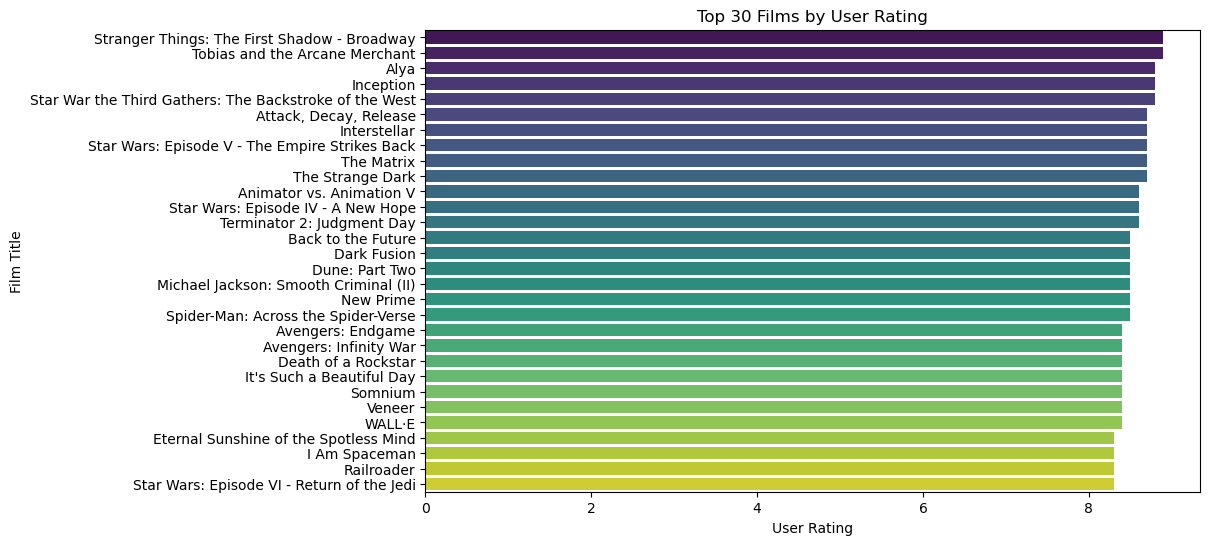

In [127]:
plt.figure(figsize=(10,6))
sns.barplot(x='User Rating', y='titles', data=top30_film_user, hue=top30_film_user['titles'], palette='viridis', dodge=False, legend=False)
plt.xlabel('User Rating')
plt.ylabel('Film Title')
plt.title('Top 30 Films by User Rating')
plt.show()

##### Top 30 best films (by Critic Rating)

In [129]:
top30_film_critic = imdb_finaldt.nlargest(30, 'Critic Rating')[['titles', 'Critic Rating']]
print('Top 30 Films by Critic Rating:')
print(top30_film_critic.to_string(index=False))

Top 30 Films by Critic Rating:
                                                     titles  Critic Rating
                                      Bride of Frankenstein           95.0
                                                     WALL·E           95.0
                                 E.T. the Extra-Terrestrial           92.0
                        Invasion of the Body Snatchers 1956           92.0
                                          Frankenstein 1931           91.0
                                                        Her           91.0
                         Close Encounters of the Third Kind           90.0
                                  It's Such a Beautiful Day           90.0
                         Star Wars: Episode IV - A New Hope           90.0
                      Eternal Sunshine of the Spotless Mind           89.0
                                              Black Panther           88.0
                                               Donnie Darko          

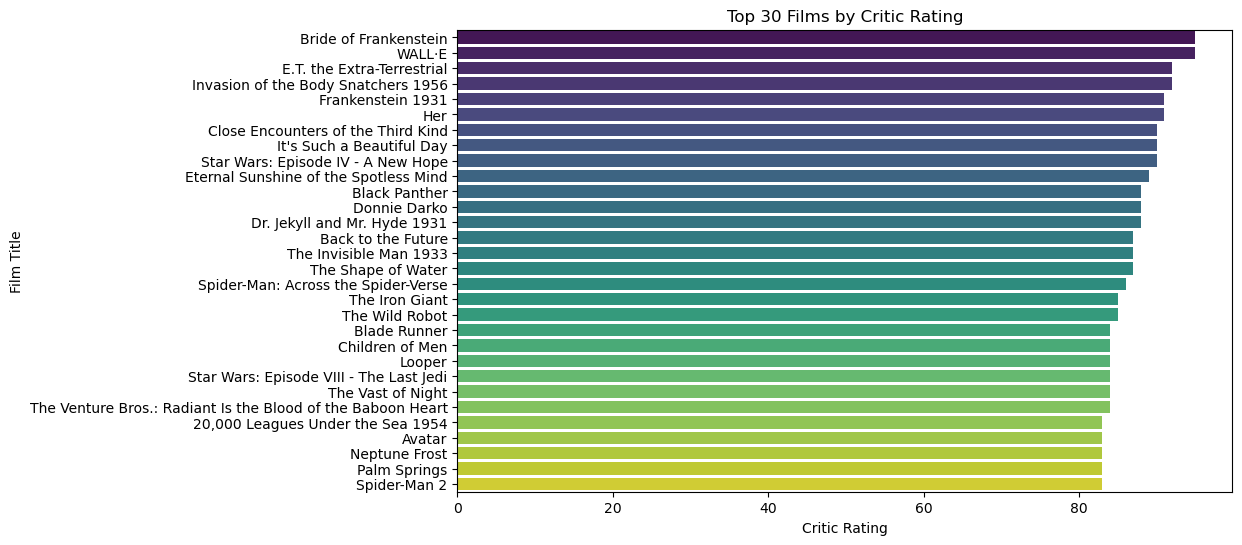

In [131]:
plt.figure(figsize=(10,6))
sns.barplot(x='Critic Rating', y='titles', data=top30_film_critic, hue=top30_film_critic['titles'], palette='viridis', dodge=False, legend=False)
plt.xlabel('Critic Rating')
plt.ylabel('Film Title')
plt.title('Top 30 Films by Critic Rating')
plt.show()

##### Diference between User Rating and Critic Rating

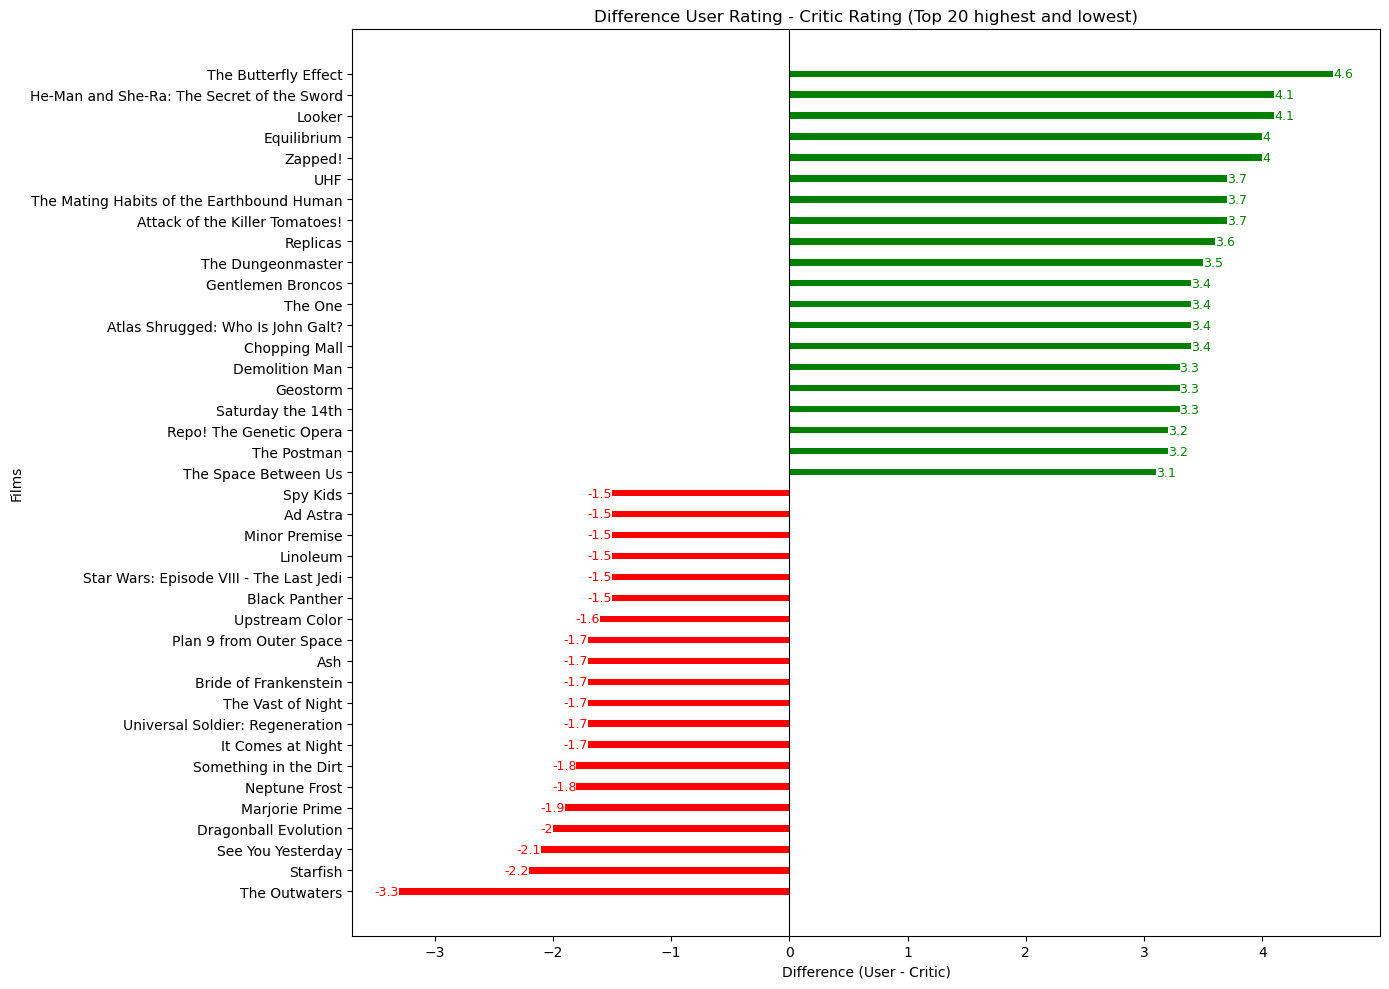

In [138]:
imdb_finaldt['diff_rating'] = imdb_finaldt['User Rating'] - imdb_finaldt['Critic Rating']/10

diff_20_larg = imdb_finaldt.nlargest(20, 'diff_rating').copy()  # 20 largest
diff_20_larg['Tipo'] = 'Maior diferença'

diff_20_lowest = imdb_finaldt.nsmallest(20, 'diff_rating').copy()   # 20 lowest
diff_20_lowest['Tipo'] = 'Menor diferença'


df_diff = pd.concat([diff_20_larg, diff_20_lowest])  # merging
df_diff = df_diff.sort_values('diff_rating')  # ordering

plt.figure(figsize=(14,10))
colors = df_diff['diff_rating'].apply(lambda x: 'green' if x > 0 else 'red')
plt.barh(df_diff['titles'], df_diff['diff_rating'], color=colors, height=0.3)

for i, (val, name) in enumerate(zip(df_diff['diff_rating'], df_diff['titles'])): # adding values
    txt = f"{val:.1f}".rstrip('0').rstrip('.')     # round to only 1 decimal place
    plt.text(val, i, txt, va='center',
             ha='left' if val > 0 else 'right',
             color=colors.iloc[i], fontsize=9)


plt.title("Difference User Rating - Critic Rating (Top 20 highest and lowest)")
plt.axvline(0, color='black', linewidth=0.8)  # linha no zero
plt.xlabel("Difference (User - Critic)")
plt.ylabel("Films")
plt.tight_layout()
plt.show()

#### Popularity

##### Top 20 most popular films

In [157]:
top20_pop = imdb_finaldt.nlargest(20, 'Popularity')[['titles','Popularity']]
print('Top 20 popular films:')
print(top20_pop.to_string(index=False))

Top 20 popular films:
                                      titles  Popularity
  Star Wars: Episode VII - The Force Awakens   1000000.0
                                 The Martian    978000.0
                              Dune: Part One    973000.0
                     Avengers: Age of Ultron    972000.0
                     Spider-Man: No Way Home    972000.0
         Captain America: The Winter Soldier    946000.0
          Captain America: The First Avenger    944000.0
                                  Iron Man 3    942000.0
                                  Spider-Man    936000.0
                                  Iron Man 2    914000.0
   Star Wars: Episode I - The Phantom Menace    903000.0
                                       Logan    901000.0
                  Captain America: Civil War    900000.0
Star Wars: Episode III - Revenge of the Sith    896000.0
                                Donnie Darko    890000.0
                               Black Panther    886000.0
         

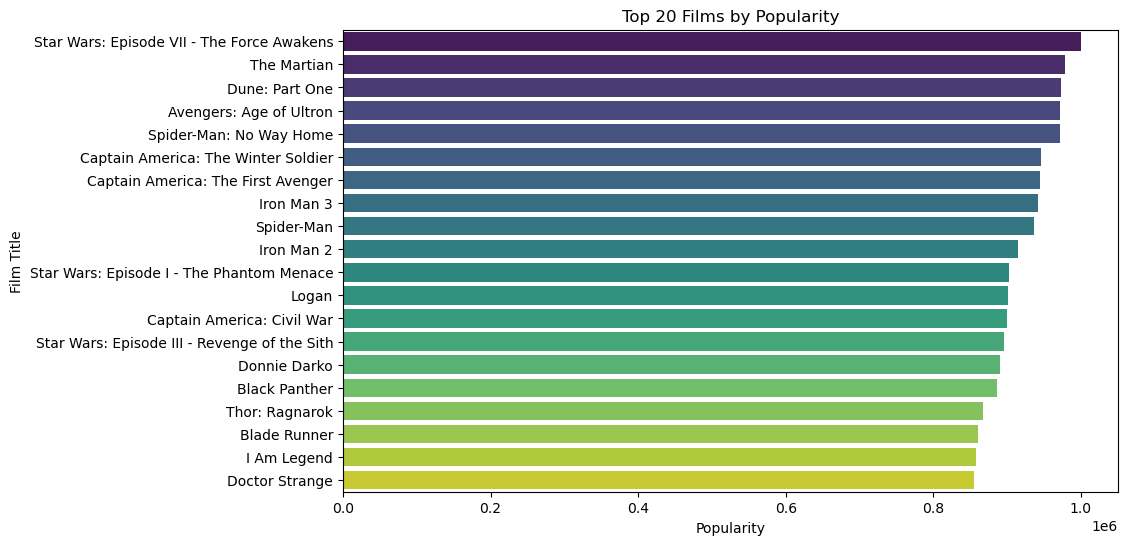

In [159]:
plt.figure(figsize=(10,6))
sns.barplot(x='Popularity', y='titles', data=top20_pop, hue=top20_pop['titles'], palette='viridis', dodge=False, legend=False)
plt.xlabel('Popularity')
plt.ylabel('Film Title')
plt.title('Top 20 Films by Popularity')
plt.show()

#### Duration

##### Top 20 longest films

In [148]:
top20_longest = imdb_finaldt.nlargest(20, 'duration')[['titles','duration']]
print('Top 20 longest films:')
print(top20_longest.to_string(index=False))

Top 20 longest films:
                                    titles  duration
Commando Cody: Sky Marshal of the Universe     361.0
                          Girl Blood Sport     354.0
                             The Power God     300.0
             The Secret of Treasure Island     300.0
               Flash Gordon's Trip to Mars     299.0
           The Green Hornet Strikes Again!     293.0
 Captain Video: Master of the Stratosphere     287.0
                       Shadow of Chinatown     281.0
                   Mysterious Doctor Satan     267.0
                        The Phantom Creeps     265.0
                          Batman and Robin     263.0
                Dick Tracy vs. Crime, Inc.     263.0
                     The Green Hornet 1940     258.0
                            Brick Bradford     257.0
                     Atom Man vs. Superman     252.0
                    Mysterious Island 1951     252.0
                              Bruce Gentry     246.0
                        

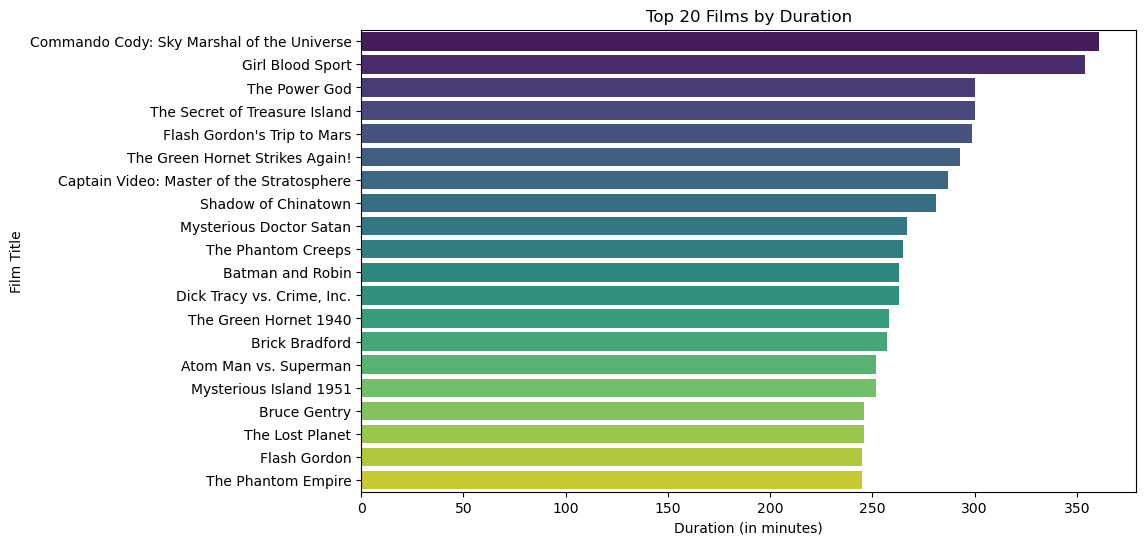

In [153]:
plt.figure(figsize=(10,6))
sns.barplot(x='duration', y='titles', data=top20_longest, hue=top20_longest['titles'], palette='viridis', dodge=False, legend=False)
plt.xlabel('Duration (in minutes)')
plt.ylabel('Film Title')
plt.title('Top 20 Films by Duration')
plt.show()

##### Top 20 Shorter films

In [171]:
top20_short = (imdb_finaldt[imdb_finaldt['duration'] > 0]       # out films with duration = 0 min
    .nsmallest(20, 'duration')[['titles','duration']])

print('Top 20 shorter films:')
print(top20_short.to_string(index=False))

Top 20 shorter films:
                                   titles  duration
                                 Crawlers       5.0
                      The Unknown Trilogy      26.0
        Mr. Payback: An Interactive Movie      30.0
                 Animator vs. Animation V      31.0
                                Neon Fear      40.0
               Ascension of the Demonoids      45.0
                          Batman: Anarchy      45.0
                   Escape from New Jersey      45.0
                               Fast Shark      45.0
              Fast Shark II: Faster Shark      45.0
            Fast Shark III: Fastest Shark      45.0
                  Humanoids from Atlantis      45.0
         Lego Hero Factory: Savage Planet      45.0
                    Max Steel: Team Turbo      45.0
                  Star Trek: Captain Pike      45.0
            Wolf Tracer's Dinosaur Island      45.0
                       As the Earth Turns      46.0
           Lego Marvel Avengers: Code Red 

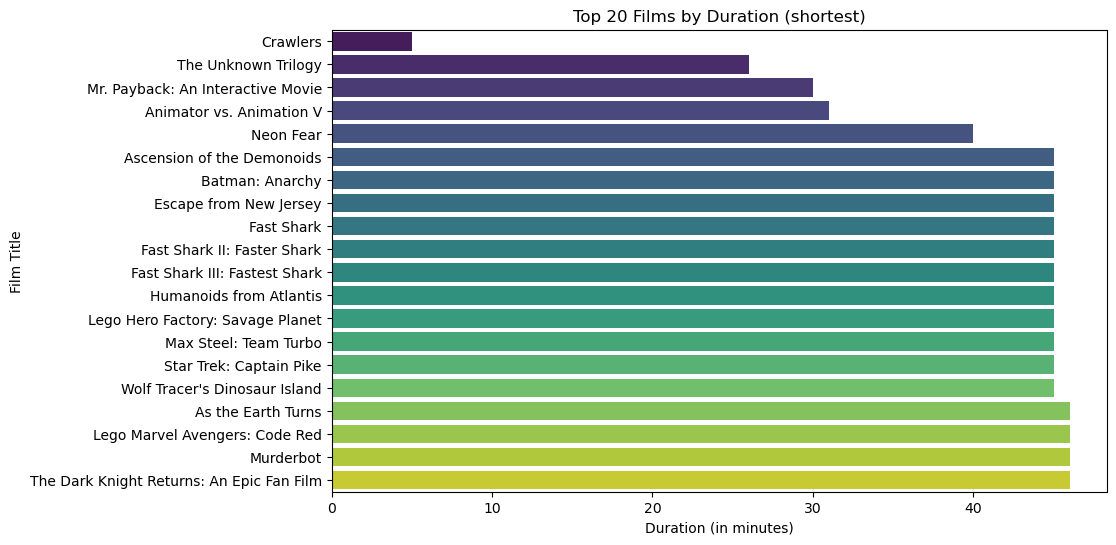

In [177]:
plt.figure(figsize=(10,6))
sns.barplot(x='duration', y='titles', data=top20_short, hue=top20_short['titles'], palette='viridis', dodge=False, legend=False)
plt.xlabel('Duration (in minutes)')
plt.ylabel('Film Title')
plt.title('Top 20 Films by Duration (shortest)')
plt.show()

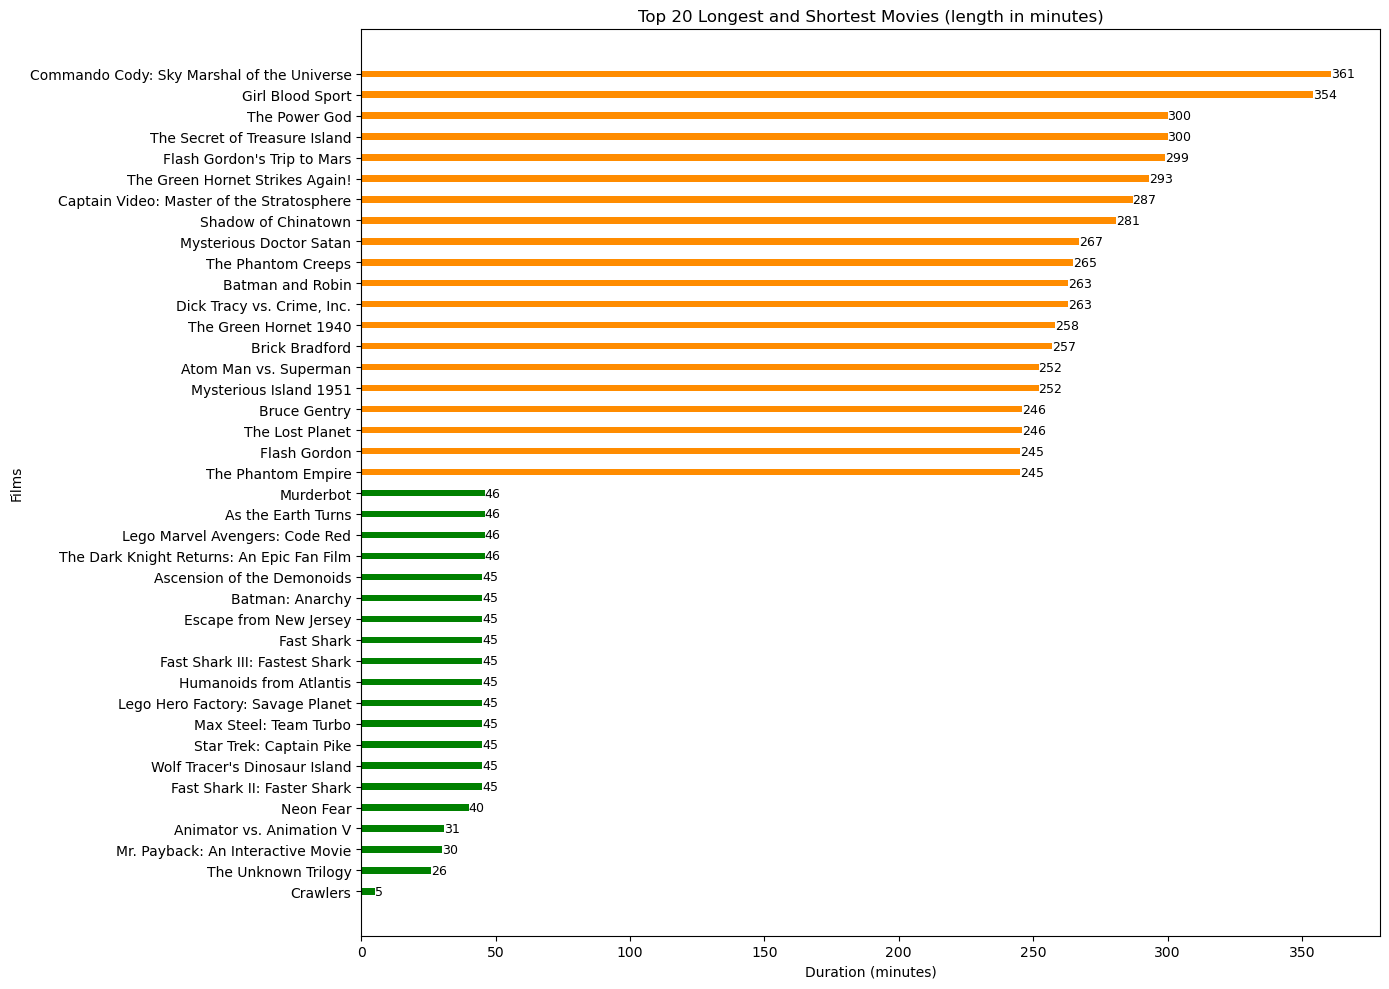

In [191]:
top20_longest['Type'] = 'longest'
top20_short['Type'] = 'shortest'

df_duration = pd.concat([top20_longest, top20_short])     # merge
df_duration = df_duration.sort_values('duration')         # ordering
colors = df_duration['Type'].map({'shortest': 'green', 'longest': 'darkorange'})   # defining colors

plt.figure(figsize=(14,10))
plt.barh(df_duration['titles'], df_duration['duration'], color=colors, height=0.3)

for i, (val, name) in enumerate(zip(df_duration['duration'], df_duration['titles'])):  # adding values
    txt = f"{val:.0f}"   # round
    plt.text(val, i, txt, va='center', ha='left', color='black', fontsize=9)

plt.title("Top 20 Longest and Shortest Movies (length in minutes)")
plt.xlabel("Duration (minutes)")
plt.ylabel("Films")
plt.tight_layout()
plt.show()

#### Directors

##### Top 15 most productive directors

In [198]:
top15_productive = imdb_finaldt['Director'].value_counts().nlargest(15)
print(top15_productive)

Director
Mark Polonia             22
Fred Olen Ray            16
Albert Pyun              14
Spencer Gordon Bennet    14
David DeCoteau           12
Charles Band             12
Ford Beebe               11
Roger Corman             11
Bert I. Gordon           10
Robert Rodriguez         10
Christopher R. Mihm      10
Steven Spielberg          9
Phillip J. Roth           9
Donald G. Jackson         9
Jack Arnold               8
Name: count, dtype: int64


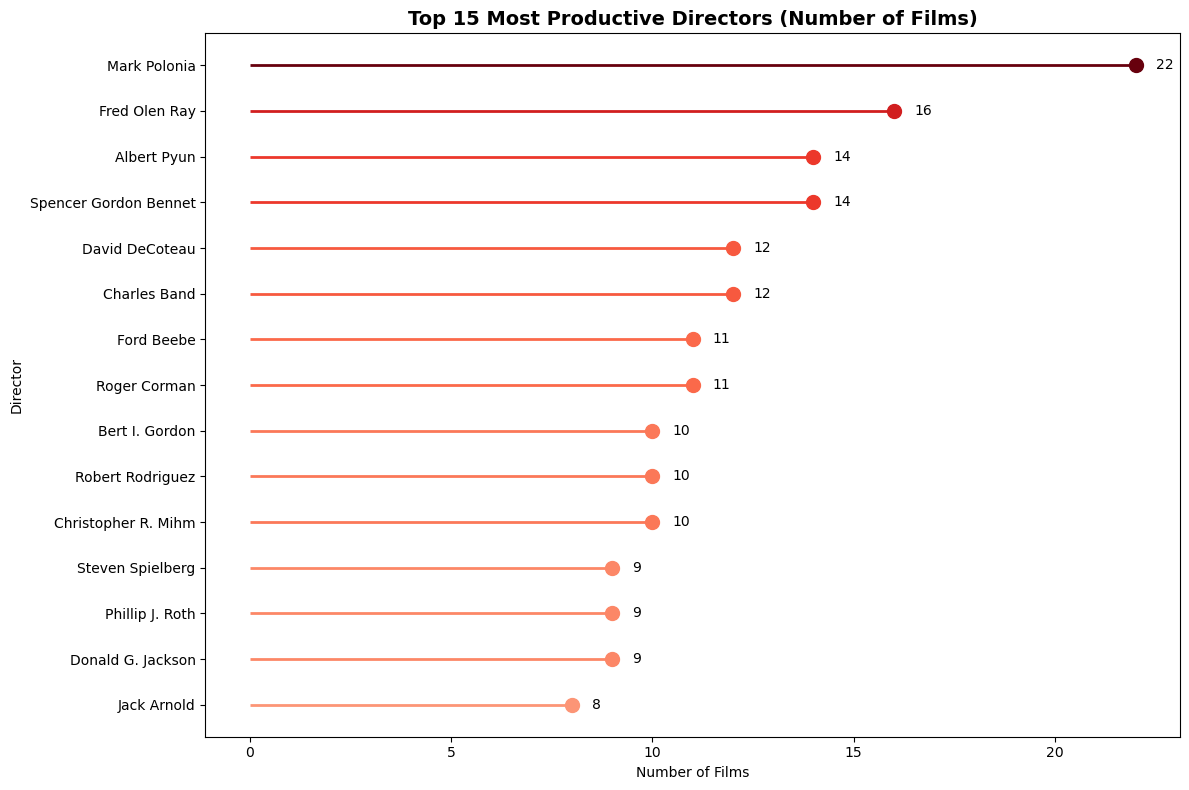

In [216]:
top15_productive = imdb_finaldt['Director'].value_counts().nlargest(15)

plt.figure(figsize=(12,8))
colors = plt.cm.Reds(top15_productive.values / top15_productive.values.max())    

for i, (director, count) in enumerate(top15_productive.items()):
    plt.hlines(y=i, xmin=0, xmax=count, color=colors[i], linewidth=2)   # linha
    plt.plot(count, i, "o", color=colors[i], markersize=10)             # bolinha
    plt.text(count + 0.5, i, str(int(count)), va="center", fontsize=10) # número

plt.yticks(range(len(top15_productive)), top15_productive.index)
plt.gca().invert_yaxis()  # mais produtivo no topo
plt.title("Top 15 Most Productive Directors (Number of Films)", fontsize=14, weight="bold")
plt.xlabel("Number of Films")
plt.ylabel("Director")
plt.tight_layout()
plt.show()

#### Production Companies

##### Top 20 most productiver Production Companies

Includes both films produced by the producer alone and films produced in conjunction with other producers.

In [229]:
import ast

# se a coluna estiver como string de lista, transforma em lista de fato
imdb_finaldt['Production Companies'] = imdb_finaldt['Production Companies'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

# explode a coluna para ter 1 linha por produtora
prod_exp = imdb_finaldt.explode('Production Companies')

# conta os 20 principais
top20_prod = prod_exp['Production Companies'].value_counts().nlargest(20)

# transforma em DataFrame para heatmap
df_heat = top20_prod.to_frame().T
df_heat.index = ["Nº de Filmes"]

# plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
sns.heatmap(df_heat, annot=True, fmt="d", cmap="Reds", cbar=False, linewidths=1)
plt.title("Top 20 Produtoras Mais Produtivas (Nº de Filmes)", fontsize=14, weight="bold")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

ValueError: DataFrame columns must be unique. Duplicate columns: ['1,001 Ways Productions', '1066 Pictures', '1157 Productions', '120dB Films', '141 Entertainment', '1492 Pictures', '19th Hole Entertainment', '1inMM Productions', '2 Cities Productions', '2 Red Rabbit Films', '2+2 Films', '20th Century Fox Home Entertainment', '20th Century Studios', '20th Digital Studio', '21 Laps Entertainment', '2100films', '21st Century Film Corporation', '2293 Productions', '285 Pictures', '2AM', '2Tiny Entertainment', '3 Arts Entertainment', '3 Keys Media', '3 in the Box', '30 Bones Cinema', '30 Something Productions', '308 Ent', '3311 Productions', '360 Entertainment', '360 Sound and Vision Productions', '377 Films', '3GI Industries', '3QU Media', '3Roundburst Productions', '3rd Films', '4 Mile Productions', '4 Strands Studios', '40 Acres & A Mule Filmworks', '40/7 Studios', '42', '454 Productions', '5100 Films', '553AM Creative Group', '555 FIlms', '60 Second Film School Productions', '6th & Idaho Productions', '7 Ideas', '72nd St. Films', '73140323 Producciones Cinematográficas', '777 Films Corporation', '8168 Productions', '8383 Productions', '852 Films', '856 Films', '8th Sense Productions,', '9.99 Films', '91 Redrams Productions', 'A Bunch of Filmmakers', 'A Groovy Workshed Concept', 'A Group of Ferrets', 'A Stream In The Desert', 'A Strike to Burn Productions', 'A+M Creative', 'A-Level Pictures', 'A-Pix Entertainment', 'A-Train Films', 'A.C. Lyles Productions', 'A.D.P. Pictures', 'A.I.A. Productions', 'A.J. Productions', 'A.J.Productions', 'A113', 'A24', 'AB-PT Pictures Corp.', 'ABC Motion Pictures', 'ABC Pictures', 'ACE Pictures Entertainment', 'ACH', 'ADL Films', 'AG Studios', 'AGATE Films', 'AGBO', 'AGC Studios', 'AI Multimedia', 'AK Entertainment', 'AMBI Group', 'AML Productions', 'AMP / Diamond Dust', 'APJAC Productions', 'ARC Entertainment (II)', 'ASAP Entertainment', 'ASP S.A.', 'ATOZ Films', 'AV1 Productions', 'AVCO Embassy Pictures', 'AYC Productions', 'AZ Film Studios', 'About Blank', 'Abrupt Films', 'Abstract Forces', 'Abstractor Studios', 'Absurd Hero Productions', 'Abtcon Pictures', 'Abundant Productions', 'Academy Entertainment', 'Academy International', 'Accelerated Matter', 'Accelerator Films', 'Access Productions (II)', 'Ace Entertainment', 'Acme Films Ltd.', 'Acme Holding Company', 'Acme Rocket Fuel', 'Acrostar Films', 'Action House', 'Action International Pictures (AIP)', 'Action This Day!', 'Action Xtreme', 'Actionhouse Pictures', 'Active Entertainment', 'Ad Hominem Enterprises', 'Adam Fields Productions', 'Adamant Images', 'Adams Package', 'Addictive Pictures', 'Adirondack Films', 'Admit One Pictures', 'Adult Swim', 'Adventure Company', 'Adventure Pictures II', 'Affidavit Productions', 'Afflicted Pictures', 'After Dark Films', 'AfterBurner Entertainment', 'AfterLight Pictures', 'Age To Age Entertainment LLC', 'Airwolf Drones', 'Ajnabi Productions', 'Al Bravo Films', 'Aladin Studios', 'Albert Band International Productions Inc.', 'Albert Jay Cohen Productions', 'Albert Zugsmith Productions', 'Albright Films Inc.', 'Alcon Entertainment', 'Aldamisa Entertainment', 'Alessi Films', 'Alexander Groupe', 'Algemene Vereniging Radio Omroep (AVRO)', 'Alianza Films International', 'Alibaba Pictures Group', 'Alien Donut Films', 'AlienGrey Zone-X 1B', 'Alive Films', 'Alkali Digital', 'All American Film Corporation', 'All American Pictures', 'All For George Productions', 'Alle Films', 'Allegra Pictures', 'Alliance Digital Studios', 'Alliance Entertainment', 'Alliance Films', 'Alliance of Canadian Cinema, Television and Radio Artists (ACTRA)', 'Allied Artists Pictures', 'Allied Entertainments Group PLC', 'Alligator', 'Allison Shearmur Productions', 'Allott Productions', 'Allspark Pictures', 'Almost Never Films Inc.', 'Aloe Entertainment', 'Alpha Dog Productions', 'Alphabet Soup Films', 'Alphaville Films', 'Alpine Medien Productions', 'Alpine Pictures', 'Alta Vista Productions', 'Altamira Media', 'Altar Productions', 'Altar Rock', 'Altered L.A.', 'Alterian', 'Alternate Ending Films', 'Alternate Ending Studios', 'Amalgamated Dynamics', 'Amarath Arc', 'Amazing', 'Amazing Film Productions', 'Amazing Movies', 'Amazon Studios', 'Ambition Pictures', 'Amblimation', 'Amblin Entertainment', 'Amblin Partners', 'Ambrosino / Delmenico', 'Ambush Entertainment', 'Amen Ra Films', 'Amercent Films', 'American Artist Productions', 'American Cinema Marketing', 'American Courtyard Productions', 'American Dream Labs', 'American Empirical Pictures', 'American Entertainment Partners II L.P.', 'American Family Productions', 'American Film Institute (AFI)', 'American General Pictures', 'American Independent Productions', 'American Interactive Pictures', 'American International Pictures (AIP)', 'American Light & Fixture', 'American National Enterprises', 'American Pictures', 'American Pictures Company', 'American Playhouse', 'American Pop Productions', 'American Scenes', 'American Studio Productions', 'American Widescreen Pictures', 'American World Pictures (AWP)', 'American Zoetrope', 'Amethyst Films Production', 'Amnis Investments', 'Amsell Entertainment', 'Amuyen Producciones', 'An Immortal', 'An Impulsive Production', 'An Olive Branch Productions', 'AnARcHy 101 Productions', 'Anagram Pictures', 'Anamorphic Media', 'Anamorphosis Productions', "Anarchist's Convention Films", 'Anarchos Pictures', 'Anchor Stone Productions', 'And You Films', 'Andale Pictures', 'Andre Champagne Productions', 'Andromeda Motion Pictures', 'Angel City Pictures', 'Angel Valley Productions', 'Angry Baby Monkey Pictures', 'Angry Films', 'Angry Jimmy Films', 'Angry Nun Productions', 'Animal Kingdom', 'Animal Logic', 'Animal Planet', 'Animals', 'Animation Film Cologne', 'Animationwerks', 'Aniventure', 'Ankaboot Productions', 'Annabell Pictures', 'Annapurna Animation', 'Annapurna Pictures', 'Anonymous Content', 'Anova Pictures', 'Antarctic Pictures', 'Anthem & Song', 'Anthill Productions', 'Anti-Villain Media', 'Antibes Inc.', 'Antibody Films', 'Antic Pictures', 'Apelles Entertainment', 'Aperture Entertainment', 'Aperture Media Partners', 'Apjac International', 'Apollo Pictures', 'Apollo Productions / AAR Digital', 'ApolloMedia Distribution', 'ApolloProMedia GmbH & Co. 1. Filmproduktion KG (I)', 'ApolloProMedia GmbH & Co. 2. Filmproduktion KG', 'Appalachian Film', 'Apple', 'Apple/Rose Productions', 'Arachnid Productions', 'Arad Productions', 'Aramid Entertainment Fund', 'Arbor Avenue Films', 'Arc Animation and Visual Effects', 'Arc Entertainment Ltd.', 'Arc Productions', 'Arcana Productions', 'Arcana Studio', 'Arch Oboler Productions', 'ArchAngel Films', 'ArchImage Studio', 'Archetype Pictures', 'Argent Film Productions', 'Argo One Productions', 'ArieScope Pictures', 'Aries Films International', 'Arista Productions Inc.', 'Armada Pictures', 'Armageddon Films', 'Armian Pictures', 'Armored Vision', 'Armory Films', 'Arramis Films', 'Arrowstorm Entertainment', 'ArsonCuff Entertainment', 'Art Held Hostage', 'Art In Motion', 'Art of War Films', 'Art of War films', 'Artbox', 'Artfire Films', 'Artifact Films', 'Artigo Indie', 'Artikulacija', 'Artisan Entertainment', 'Artist View Entertainment', 'Artistar', 'Artists Public Domain', 'Artists Unlimited Films', 'Artless Media', 'Arts+Labor', 'Asgard Entertainment', 'Aspen Film Society', 'Aspire Motion Pictures', 'Assembly Line Entertainment', 'Associated FilmGroup (AFG)', 'Associated Producers (API)', 'Associated Television International', 'Astro Base Go!', 'Astroidio', 'Atlantic', 'Atlantic Entertainment Group', 'Atlantic Film Productions', 'Atlantis Films', 'Atlas 2 Productions', 'Atlas 3 Productions', 'Atlas Entertainment', 'Atlas Independent', 'Atlas Ltd.', 'Atomic Blonde Entertainment', 'Atomic Monster', 'Aubrey Schenck Productions', 'August Entertainment', 'August Heart Entertainment', 'Aura Entertainment', 'Aureus Pictures', 'Aurora', 'Aurora Entertainment', 'Aurum Film Group', 'Austin Film Group', 'Automatic Entertainment', 'Automatic Media', 'Automatik Entertainment', 'Autumn Entertainment', 'Autumn Film Company', 'Avail Entertainment', 'Avalon Productions', 'Avantmark Pictures', 'Avenet Images Productions', 'Avi Arad Productions', 'Avnet/Kerner Productions', 'AwFraq', 'Awesomeness Films', 'Awfraq Studios', 'Axiom Live Media', 'Axiom Productions', 'Axis Mundi Productions', 'Aye Films', 'Ayla Films', 'Aymara Films', 'Azalea Pictures', 'B&H Productions Inc.', "B'alam Entertainment", 'B.I. & L. Releasing', 'B22 Films', 'BB Film Productions', 'BEL AIR-Pictures (Los Angeles)', 'BFD', 'BMN Films', 'BNS Productions', 'BRG Films', 'BRON Studios', 'BUFO', 'Babaloo Studios', 'Baby Steps Entertainment', 'Backstage Productions', 'Backyard Films', 'Bad Amigo Pictures', 'Bad Badger', 'Bad Beard', 'Bad Bob Productions', 'Bad Dreams', 'Bad Robot', 'Bad Theology', 'BadFritter Films', 'Badhouse Studios Mexico', 'Bahr Productions Inc.', 'Bakshi Productions', 'Balboa Productions', 'Balcor Film Investors', 'Balkanic Media', 'Ballistic Digital Studios', 'Ballistic Films', 'Balls Of Lightning', 'Baltimore Pictures', 'Bammo', 'Bandeira Entertainment', 'Bandit Motion Pictures', 'Barbera Productions', 'Barefoot Girl Productions', 'Baron Jay Film Group', 'Barron Perter Productions', 'Barry & Enright Productions', 'Barry Mendel Productions', 'Barton Films', 'Baumant Entertainment', 'Baumgarten Management and Productions (BMP)', 'Baumgarten-Prophet Entertainment', 'Bay Bridge Productions Inc.', 'Bay Films', 'Bazelevs Entertainment', 'Bazelevs Production', 'Be 4 Media', 'Beach Pictures', 'Bearfruit Films', 'Beck Woods', 'Bee-Hive Productions', 'Before The Door Pictures', 'Bekind Rewind Production', 'Bel-Air Productions', 'Belka Strelka', 'Bell & Howell', 'Bella Productions', 'Belladonna Productions', 'Bellanova Films', 'Belltower Productions', 'Ben Wilson Productions', 'Benacus Entertainment', 'Benaroya Pictures', 'Benattar/Thomas Productions', 'BenderSpink', 'Benedict Bogeaus Production', 'Benetone Films', 'Bergman', 'Bergquist-Levy Productions', 'Berkeley Productions', 'Berlanti Productions', 'Berlin 7', 'Bernard Small Productions', 'Bersin Pictures', 'Best Brains', 'Betmar-Heliand Productions,', 'Beyond Casual Media', 'Beyond Infinity', 'Beyond The Mothership', 'Big Beach', 'Big Block Media Holdings', 'Big Broad Guerrilla Monster', 'Big Budget Productions', 'Big Bug Pictures', 'Big Headz Entertainment', 'Big Idea Entertainment', 'Big Indie Pictures', 'Big Jack Productions', 'Big Picture', 'Big Puddle Films', 'Big Screen Entertainment Group', 'Big Swing Productions', 'Big World Pictures (II)', "Bijou Cine'", 'Bike Lock Entertainment', 'Bill Osco Productions', 'Bill Zebub Productions', 'Biolane', 'Biomorphs Inc.', 'Bioskop Film', 'Biouw Beleggingen B.V.', 'Birdshot Pictures', 'Bishop Studios LLC', 'Biting Sheep Productions', 'Bitter Boy Productions Ltd.', 'Bitter End Media Group', 'Bitter Films', 'Black Bar Mitzvah', 'Black Bay Entertainment', 'Black Bear', 'Black Box Films', 'Black Chalk', 'Black Diamond Productions', 'Black IX Pictures', 'Black Jellybeans', 'Black Mandala', 'Black Owl Productions', 'Black Rhino Productions', 'Black Rider Productions', 'Black Sand Pictures', 'Black Sparrow Films', 'Black Velvet Films', 'Black Vortex Cinema', 'Black Wake Enterprises', 'Black Wing Digital', 'Black Wolf Pictures', 'Blackmrkt', 'Blackstone Entertainment', 'Blaen-Y-Maes Bootleg Films', 'Blancbiehn Productions', 'Bland Productions', 'Blanket Hill Productions', 'Bleecker Street Films', 'Bleiberg Entertainment', 'Blessed Elysium Motion Pictures', 'Blinding Edge Pictures', 'Blinky Productions', 'Blondietimestwo', 'Blood Oath', 'BloodWorks', 'Bloodshot Pictures', 'Bloody Disgusting', 'Bloomgarden Films', 'Blu Lantern Pictures', 'Blue Cactus Pictures', 'Blue Creek Pictures', 'Blue Mariah Pictures', 'Blue Ribbon Content', 'Blue Rider Pictures', 'Blue Rider Puerto Rico', 'Blue Ridge Entertainment', 'Blue River Films', 'Blue Seraph Productions', 'Blue Silver Films', 'Blue Sky Studios', 'Blue Train Productions', 'Blue Tulip Productions', 'Blue Voo Doo Technologies', 'Blue Water Films', 'Blue Wolf', 'Blue Wolf Films', 'Blue Yonder Films', 'Bluegrass Film Experience', 'Blumhouse Productions', 'Blumhouse Television', 'Boiling Point Media', 'Bok Universe', 'Boku Films', 'Bold Film Productions', 'Boldly Go Productions', 'Bolman Services', 'Bona Film Group', 'BondIt Media Capital', 'BoomGates', 'Boonie Publishing & Productions', 'Border2Border Entertainment', 'Borealis Enterprises', 'Borealis Enterprises Inc.', 'Boredumb Pictures', 'BoroKid Productions', 'Bossk VFX', 'Boston Dutch Productions', 'Boston Film Family', 'BoulderLight Pictures', 'Boundless Pictures', 'Bowers Media Group Inc.', 'Boxing Cat Films', 'Boxo Productions', 'Boy Meets Girl Productions', 'Boy in the Drain Productions', 'Bradman Media Unlimited', 'Braeburn Entertainment', 'Brahlemieri', 'Braidwood Films', 'Brain Scratch Productions', 'Brainfeeder Films', 'Brandon Films', 'Brandywine Productions', 'BraxtanFILM', 'Break Media', 'Breton Film Productions', 'Brett Kelly Entertainment', 'Briarcliff Entertainment', 'Brick Cave Media', 'Brickell & Broadbridge International (BBI)', 'Bright Ideas', 'Bright Penny Productions', 'Bright Rectangle Films', 'BrighterMoon Entertainment', 'Brillstein-Grey Entertainment', 'Brimstone Entertainment LLC', 'Brimstone Productions', 'British Columbia Film Commission', 'British Film Commission', 'Broadstroke Entertainment', 'Broadway Pictures', 'Broadwood Media', 'Broken Ear Productions', 'Broken Films', 'Broken Road Productions', 'Broken Table Productions', 'Bron Creative', 'Bronco Productions', 'Bronze Eye Productions', 'Brooklyn Sacastic Films', 'Brooklyn West Productions', 'Brooksfilms', 'Brookwell-McNamara Entertainment', 'Brotherhood Studios', 'Brothers Young Productions', 'Brouwersgracht Investments', 'Brownstone Productions (II)', 'Bruce Lansbury Productions', 'Bruin Grip Services', 'Brutal The Movie', 'Bryna Productions', 'Buena Luz Media', 'Buena Vista International', 'Bug Out Bag Productions', 'Bullish Productions', 'Bullwinkle Studios', 'Buncom Media International', 'Bungalow Media', 'Buoy 22 Films', 'Burba Hayes', 'Burg/Koules Productions', 'Burgindie Pictures', 'Burk A Project', 'Burke Management', 'Burnin Rubber Music Publishing / Royal Middleton Publishing', 'Burning Myth Productions', 'Burnside Entertainment', 'Burnt Reindeer Films', 'Bursell Productions', 'Busted Buggy Entertainment', 'Busted Shark Productions', 'Buy Here Pay Here Entertainment', 'Buzzfeed Studios', 'Byzantine Productions', 'C & V Films 9', 'C.A.P.S.', 'C.G.K. Productions', 'C.H.U.D. Productions', 'C.S. Drury Productions', 'CBS Europa', 'CBS Films', 'CBS Studios', 'CBS Television Studios', 'CIM Entertainment,', 'CMPC', 'CNGM Pictures', 'CO 1. Filmproduktions KG', 'COTU Media', 'CPI', 'CST Productions', 'Cabin Fever Entertainment', 'Cableye Cinematics', 'Caesar Film', 'Cal Cine', 'CalArts', 'Caliber Media Company', 'Calibre Films', 'Califilm', 'California Pictures', 'Calimari Productions', 'Calongne-Sevin', 'Cambridge Productions', 'Camera 40 Productions', 'Camp 9 Films', 'Camp Digital', 'Campbell Grobman Films', 'Campfire Studios', 'Campus Life Productions', 'Canada Film Capital', 'Canadian Film or Video Production Tax Credit (CPTC)', 'Canal+ Polska', 'Candy Bar Productions', 'Cannon Entertainment', 'Cannon Films', 'Cannon International', 'Cannon Pictures', 'Canyonfilmworks', 'Capital Arts Entertainment', 'Capstone Studios', 'Captain Intertia Productions', 'Car School Film-O-Rama', 'Caravan Pictures', 'Carcass Studios', 'Carden & Cherry', 'Cardiac Pictures', 'Cardoza-Francis Productions', 'Carilliam Pictures', 'Carlos Productions', 'Carmel Productions', 'Carolco Entertainment', 'Carolco Pictures', 'Carte Blanche', 'Cartel Pictures', 'Carter Film Productions', 'Cartoon Network', 'Cartoon Network Movies', 'Cartoon Network Studios', 'Cartuna', 'Cassiopeia Pictures', 'Castel Film Romania', 'Castle Hill Productions', 'Castle Rock Entertainment', 'Castlecreek Entertainment', 'Catalina Production Group', 'Catchlight Studios', 'Catfish Studios', 'Cell Block Productions Inc.', 'Celtino Entertainment', 'Centaur Films', 'Central Film Group Inc.', 'Centropolis Entertainment', 'Centropolis Film Productions', 'Centrum International Film', 'Century Associates', 'Cerito Films', 'Chabo Films', 'Chain Reaction', 'Chainsaw Kiss', 'Chameleon Filmworks', 'Champions of the Cosmos', 'Chankin Entertainment', 'Channel 101', 'Channel 83 Films', 'Channel Awesome', 'Channel Communications', 'Chaotic Sequence', 'Chapter One Films', 'Chapter V Enterprises', 'Character Brigade', 'Charles Band Productions', 'Charles Constantino', 'Charles H. Schneer Productions', 'Chartoff Productions', 'Charybdis Pictures', 'Chase Regency', 'Chemical Burn entertainment', 'Chernin Entertainment', 'Chevy Chase Films', 'Chiaramonte Films', 'Chicago Media Angels', 'Chicago Pacific Entertainment', 'ChickFlicks Productions', 'Chiller Films', 'China Lion Entertainment Production', 'China Media Capital', 'Chiodo Brothers Productions', 'Chockstone Pictures', 'Chocolatito', 'Choker Films', 'Choreografx', 'Chris Lee Productions', 'Chris Morgan Productions', 'Chris Morrissey Films', 'Christiano Film Group', 'Christopher Brian Films', 'Chriswar', 'Chu Media', 'Chu Studios', 'Chuck Jones Enterprises', 'Church Hill Productions', 'Cimarron Productions', 'CinAmerica', 'Cine Excel Entertainment', 'Cine-Clark Studios', 'CineForge Media', 'CineRidge Entertainment', 'Cinecom Entertainment Group', 'Cinecorp Production', 'Cinecorp SAC', 'Cinedata', 'Cinefont', 'Cineguild Entertainment Group', 'Cinelight Studios', 'Cinelou Films', "Cinema '84", 'Cinema 77', 'Cinema Factory', 'Cinema Group 75', 'Cinema Group Ventures', 'Cinema Home Video Productions', 'Cinema Lapiniere', 'Cinema Plus', 'Cinema Vehicles', 'Cinema Venture', 'Cinema West Productions', 'Cinemagic Visual Effects', 'Cinemand', 'Cinemarque Entertainment', 'Cinemassacre Productions', 'Cinemotion Twenty-First Inc.', 'Cinepocalypse Productions', 'Cinequanon', 'Cinequanon Pictures International Inc.', 'Cinerama Productions Corp.', 'Cinereach', 'Cinerenta Medienbeteiligungs KG', 'Cinergi Pictures Entertainment', 'Cinergi Productions N.V.', 'Cinesite Animation', 'Cinestone', 'Cinetel Films', 'Cinetron Productions', 'Cineworx', 'Cinétudes Films', 'Circle Management + Production', 'Circle Productions', 'Circus Road Films', 'Cireel Films Ltd. with Zone V Productions Ltd.', 'Citizen Skull Productions', 'City Block Productions', 'City Heat Productions', 'Claang Entertainment', 'Clarke-King Enterprises', 'Class of 85', 'Classic Media', 'Classic Media Productions', 'Classico', 'Clay Bros. Motion Pictures', 'Clear Conscience', 'Click Productions', 'Click Studios', 'Clindar', 'Clinica Estetico', 'Clonus Associates', 'Closed Door Productions LLC', 'Closet Productions', 'Cloud Atlas Productions', 'Cloud Nine Pictures', 'Cloud Walkers Entertainment', 'Clover Productions', 'Cloverfield Productions', 'Cluck Cluck Productions', 'Coats-Alexander-Coats', 'Cobalt Films', 'Cobwebster Corporation', 'Cochin Moon Productions', 'Code Productions', 'Codeblack Films', 'Coffin Creek Productions', 'Cohiba Pictures', 'Cohort Films', 'Cold Arrow Productions', 'Cold Iron Pictures', 'Coldwater', 'Coldwater Bluemoon', 'Collage Fossil', 'Collective Development', 'Collusion Films', 'Colonial Productions', 'Colonials Film', 'Color Force', 'Colossal Theatre', 'Columbia Pictures', 'Combustion Studios', 'Comet Film', 'Commercial Pictures (I)', 'Commodore Films', 'Common Wall Media', 'Company Films', 'Compass International Pictures', 'Complex', 'Complex Corporation', 'Compound B', 'Compulsion Films', 'Comworld Productions', 'Concorde Pictures', 'Concorde-New Horizons', 'Concordia Studio', 'Conde Nast Entertainment', 'Conley Entertainment Group,', 'Conquest of the Deeps Limited and Company', 'Conquistador Entertainment', 'Conrad Studios', 'Consolidated Media Holdings', 'Consortium Entertainment Group Inc.', 'Constant c Productions', 'Constantin Film', 'Constitution Films', 'Contemporary Films', 'Contend', 'Content Media', 'Content Media Corporation International', 'ContentFilm International', 'Continental Entertainment Capital', 'Continental Motion Pictures', 'Contrafilm', 'Controlled Chaos Enterprises', 'Conundrum Entertainment', 'Convergence Entertainment', 'Convoke Media', 'Cooga Mooga', 'Copper Kid Productions', 'Corinthian Productions', 'Corn LLC', 'Cornell Pictures', 'Corridor Digital', 'Corrosive Liquid Productions', 'Corvus Eye Media', 'Corwood Productions', 'Cosmic Hamlet Entertainment', 'Cosmic Pictures', 'Cosmopolitan Productions', 'Cosmovita Films', 'Couple 3 Films', 'Court Square Studios', 'Courtside Seats Productions', 'Cowboy Errant', 'Cowboy Hat Films', 'Cozy Seal Entertainment', 'Crappy World Films', 'Crazy Ants Media', 'Crazy Carrot Films', 'Create Entertainment', 'Create Pictures', 'Creative Agitation', 'Creative Film Productions', 'Creative Genius Films', 'Creative Light Entertainment', 'Creative Wealth Media Finance', "Creator's Planet", 'Creature Features', 'Creekview Entertainment', 'Creepersin Films', 'Crewless Productions', 'Crimson Wing Films', 'Crimson Wolf Productions', 'Criterion Pictures Corp.', 'Cromono International.', 'CronicLove Productions', 'Cross Creek Pictures', 'Crown International Pictures', 'Cruise/Wagner Productions', 'Crusader Entertainment', 'Crystal Pictures', 'Crystal Sky Pictures', 'Crystal Sky Worldwide', 'Cue Mark Films', 'Cult Video', 'Cult of Moi and Vous Film Producioni Company', 'Culture Shock Productions', 'Cup of Joe Film', 'Curb Entertainment', 'Curious Potato', 'Curnan Motion Picture Services (CMPS )', 'Curnan Pictures', 'CutJaw Film Company', 'Cuz Productions', 'Cyber Vengeance L.P.', 'Cyberfilms Inc.', 'Cyclohexane Productions', 'Cyfuno Ventures', 'D Studios Productions', 'D.R.B. Production Company', 'DC Comics', 'DC Entertainment', 'DC Films', 'DC Studios', 'DIC Entertainment', 'DK Entertainment International', 'DLL', 'DMG Entertainment', 'DRC Productions', 'DRF Productions', 'DV3 Productions', 'DVB', 'Dakini Productions', 'Damiano Films', 'Damn Warrior Productions', 'Dan Curtis Productions', 'Dance On Productions', 'Dangerous Curves Productions (II)', 'Dapper Cat Pictures', 'Dark Atlantic', 'Dark Blue Films', 'Dark Coast Pictures', 'Dark Continent', 'Dark Descent Productions LLC', 'Dark Dunes Productions', 'Dark Horse Entertainment', 'Dark Park Studios', 'Dark Program Productions', 'Dark Queen Productions', 'Dark Rabbit Productions', 'Dark Sky Films', 'DarkShed', 'Darkstone Entertainment', 'Darkwoods Productions', 'Dashford Media', 'David Foster Productions', 'David Gould Studios', 'David Kirschner Productions', 'David L. Hewitt and Associates', 'David L. Loew Productions', 'David Sterling Productions', 'Davis Entertainment', 'Davis-Panzer Productions', 'De Laurentiis Entertainment Group (DEG)', 'De Laurentiis Film Partners', 'De Line Pictures', 'Dead Alive Productions', 'Dead End Films', 'Dead Leaf Productions', 'Dead Sea Films', 'DeadFi Movies', 'Deadeye Films', 'Deadly Dilletantes', 'Deadly Ten', 'Death Ground', 'Deathbeast Productions', 'Decipher Entertainment', 'Deco Entertainment', 'Deep Rescue LLC', 'Deep Water Productions Motion Picture Group', 'DeepStudios', 'Dees Film Productions', 'DefTone Pictures Studios', 'Defector Films', 'DefiGravity Entertainment', 'Defiant Studios', 'Defy Media', 'Del Mar Entertainment', 'Delphi Films', 'Delphi I Productions', 'Delphi II Productions', 'Delphi III Productions', 'Delphi V Productions', 'Demeusy Pictures', 'Demon Janx', 'Dempsey Holzberg Studios', 'Denholm Trading Inc.', 'Denton Film.', 'Dentsu', 'Department of Motion Pictures', 'Department of Trade and Industry of South Africa', 'Depth of Field', 'Derio', 'Desert Wind Films', 'Design Projects Inc.', 'Destination Earth LLC', 'Destination Films', 'Destroy All Entertainment', 'Detaron Productions', 'Detention Films', 'Deverge', 'Devin Rice Studios', 'Di Bonaventura Pictures', 'DiGa Studios', 'DiNovi Pictures', 'Diablo Entertainment (II)', 'Digital Dream Studios', 'Digital Image Associates', 'Digital Interference Productions', 'Digital Magic', 'Digital Mass Films', 'Digital Melies', 'Digital Shadow Films', 'Dikenga Films', 'Diktator', 'Dimension Films', 'Dimension Pictures', 'Dimension VI', 'Dimension of Sight', 'Dino De Laurentiis Company', 'Dino de Laurentiis Communications', 'Dirty District Entertainment', 'Dirty Films', 'Disck Pictures', 'Discontinued Film', 'Disney Enterprises', 'Disney Television Animation', 'Disruption Entertainment', 'Distant Shore Films', 'Distinction Films', 'Diverse Media Group', 'Divide/Conquer', 'Diviney Pictures', 'Divinity the Film', 'Dobil Productions', 'Dobre Films', 'Dog Run Pictures', 'Doggy Door Productions', 'Domain Entertainment (II)', 'Dominion Pictures Corporation', 'Dominus Entertainment Group', 'Don Bluth Productions', "Don't Give A Damn Productions", 'Donald G. Jackson & Co.', 'Dong Seo Animation', 'Donkey Universe Films', 'Donner/Shuler-Donner Productions', "Donners' Company", 'Doodle Barnett Productions', 'Doomed Pictures', 'Dorad Corporation', 'Dorian', 'Doric Productions', 'Dormant Lion Entertainment', 'Dorset Productions', 'Double A Pictures', 'Double Dare You (DDY)', 'Double Dream', 'Double Dubuque Productions', 'Double Edge Films', 'Double Helix Films', 'Double Negative (DNEG)', 'Double R Productions (II)', 'Doubtless Dreamers', 'Dowling Productions', 'Downstream', 'Draconian Films', 'Dream Entertainment', 'DreamCatcher Productions', 'DreamScape Reality Productions', 'DreamWorks Animation', 'DreamWorks Animation Television', 'DreamWorks Pictures', 'DreamWorks Studios', 'Dreaming Droids Productions', 'Dreaming Tree Films', 'Dreams For Dead Cats Productions', 'Dreamscape Cinema', 'Dreamwalker Pictures', 'Driving With Our Eyes Shut', 'Drop Dead Films', 'Drop Shadow Productions', 'Drotcroft Limited', 'Drunk Justice Productions', 'Drury Lane Holdings', 'Dual Visions', 'Dudley Pictures Corporation', 'Dune Entertainment', 'Dune Entertainment III', 'Dunnit Films', 'Duplass Brothers Productions', 'Dwampy Verse', 'Dylan Clark Productions', 'Dylan Sellers Productions', 'E&R', 'E-Fusion Studios', 'E.J. Helms Productions', 'EBS World Entertainment', 'EGM Film International', 'EMI Films', 'EMJAG Productions', 'ERBP', 'ERP Productions (I)', 'ETK Entertainment', 'EZ Multimedia', 'Eagle Films', 'Earthbound Human Productions Inc.', 'East of York Creative', 'Eastern Film Management Corporation', 'Eastern Lion Productions', 'Eastlake Films', 'Eastman Film', 'Easy Open Productions', 'EasyAction', 'Eaves Movie Ranch', 'Echo Lake Entertainment', 'EchoWolf Productions', 'Eclectic Pictures', 'Eclipse Catering', 'Ed Ancoats', 'Ed Ancoats Inc.', 'Edge City Productions', 'Edgen Films', 'Edgewood Studios', 'Edith Productions', 'Edward L. Alperson Productions', 'Edward R. Pressman Productions', 'Eenie Ienie Over Productions', 'El Camino Films', 'El-Monde Productions', 'Electra Film Productions Inc.', 'Electric Dynamite', 'Electric Entertainment', 'Electric Pictures', 'Elephant Robot', 'Elevated Films (II)', 'Elevation 4 Entertainment', 'Elfmaniac Media', 'Ellman Film Enterprises', 'Elocin Entertainment', 'Elpis Films', 'Elysian Fields Entertainment', 'Elysian Pictures', 'Elysium Bandini Studios', 'Emanuel Cohen Productions', 'Embassy Pictures', 'Ember20', 'Emerald City Films', 'Emerald City Pictures', 'Emergence Films', 'Emirau Productions', 'Emmett/Furla Oasis Films', 'Empire Films', 'Empire Motion Pictures', 'Empire Motion pictures', 'Empire Pictures', 'Empress Film Production Corporation', 'Encanto Entertainment', 'Encounter - The Movie.', 'Encounter Productions', 'End Of All Cinema', 'Endcuts', 'Endgame Entertainment', 'Engine Film Group', 'Engineer Productions', 'Ensignmedia', 'Entelekey Media', 'Entertainment 360', 'Entertainment Concepts', 'Entertainment Events', 'Entertainment Factory', 'Entertainment One', 'Envision Casting', 'Envoy Pictures', 'Epic Dimension Films', 'Epic Enterainment Pictures', 'Epic Pictures', 'Epic Pictures Group', 'Epic Pictures Releasing', 'Epic Productions', 'Epidemic Films', 'Eric Miller Animation Studios', 'Eric Woster', 'Ersatz Film', 'Escape Artists', 'Escapology', 'Essen Productions Inc.', 'Estuary Films', 'Estudios Churubusco Azteca S.A.', 'Et tu,Films', 'Etch', 'Etch Media', 'Euro Hollywood', 'EuropaCorp', 'Event Horizon Entertainment', 'Everest Pictures Inc.', 'Evil Empire Entertainment', 'Evolve Studios', 'ExP Films', 'Excalibur Motion Pictures', 'Exclusive Media Group', 'Exclusive Roadshow Attraction', 'Executive Studio Productions', 'Exhibit', 'Existential Films', 'Exit 10 Films', 'Exit Strategy Productions', 'Expedition Films', 'Extreme Leap Motion Pictures', 'Eyeland Images', 'Eyevox', 'F.C. Rabbath Creations', 'F.P.S. Ventures', 'FGM Entertainment', 'FLSD Movie', 'FOUR Productions', 'FWP Productions', 'Fable Films', 'Fabtrax Films', 'Fabula', 'Fade to Blue', 'Fade to Blue Films', 'Fadsin Cinema Associates', 'Fahmed Entertainment Inc.', 'Failureboys', 'Fairview Productions', 'Faithless Films', 'Falcon Films', 'Faliro House Productions', 'Fall Films', 'FallBack Plan Productions', 'Falling Cat Productions', 'Falling Sky Entertainment', 'Fallout Shelter Productions', 'FalseColorFilms', 'Famous Monsters of Filmland Magazine', 'FanArmyCreations', 'Fanfare Films', 'Fangoria', 'Fantastical Cinema LLC', 'Fantasy Films (I)', 'Fantomfilm', 'Far Hills Pictures', 'Farewell Productions', 'Fast Rainbow Films', 'FastCoast Productions', 'Fathom Film Company', 'Favorit Film', 'Fearless Media Inc.', 'Fearmakers Studios', 'Feature-Faire Productions', 'Federal Films', 'Federighi Films', 'FeelTrap Records', 'Felix the Cat Creations', 'Felix the Cat Productions Inc.', 'Felt Films', 'Fewlas Entertainment', 'Fibonacci Films', 'Fickle Fish Films', 'Fighting Owl Films', 'Film Afrika Worldwide', 'Film Base', 'Film Co-Op Partners', 'Film Cube', 'Film Development Fund', 'Film Entertainment Services', 'Film Exchange', 'Film Finance Corporation', 'Film Life Factory', 'Film Line', 'Film More Entertainment', 'Film New Zealand', 'Film Ranch International', 'Film Science', 'Film Service Finland Oy', 'Film Star Pictures', 'Film Tiger', 'Film Ventures International (FVI)', 'Film002', 'FilmCore', 'FilmDistrict', 'FilmEngine', 'FilmNation Entertainment', 'FilmTiger', 'Filmation Associates', 'Filmline', 'Filmline Communications', 'Filmmakers International', 'Filmmakers Ltd.', 'Filmopoly', 'Filmquest Pictures', 'Filmrullen', 'Films Royale', 'Filmsmith Production & Management', 'Filmtown International', 'Filmwerks', 'Filmworks', 'Filmworks/FX', 'Filosophia', 'Final Vision Films', 'Finch Hollow Productions', 'Fir and Cedar', 'Firdbird International Pictures', 'Firebrand Media Group', 'Fireshoe Productions', 'Fireside Film', 'Firespire Productions', 'First Class Productions', 'First Floor Features', 'First Leisure', 'First Look International', 'First Look Pictures', 'First National Pictures', 'First Threshold', 'Fischerjones', 'Fit Via Vi Film Productions', 'Five Cow Pictures', 'Five Star Studios', 'Fixed Sticks', 'Flagship Features', 'Flamboyance Films', 'Flame Ventures', 'Flash Features', 'Flashout Films', 'Flashpoint (I)', 'Fleanation Productions', 'Flood 93 Films', 'Floren Shieh Productions', 'Flower Films (II)', 'Fly High Films', 'Focus Features', 'FocusFox Studio', 'Foggy Bottom Pictures', 'Folkloristics', 'Follow Through Productions', 'Foresight Entertainment', 'Foresight Unlimited', 'Forge', 'Forgotten Path', 'Formidable File Films', 'Formidable Films', 'Fortaleza Filmworks', 'Forthright Productions Partners', 'Fortress Films', 'Fortunafilm', 'FortyFour Studios', 'Fosun Group Forever Pictures', 'Fotocomics Productions', 'Four Crown Productions Inc.', 'Four Horsemen Films', 'Four Square Productions', 'Fourgrounds Media', 'Fox Animation Studios', 'Fox Film Corporation', 'Fox Films', 'Fox Lorber Features', 'Fox Searchlight Pictures', 'Fractal Clouds Productions', 'Fragmighty', 'Frame 29 Films', 'Franchise Pictures', 'Frank Lloyd Productions', 'Frank Yablans Presentations', 'Franklin-Husser Entertainment', 'Frankovich Productions', 'Frederick S. Pierce Company', 'Freecs Films', 'Freedom Media', 'Freestyle Creative', 'Freezer Burn', 'French Tax Credit', 'Fresh Ground Pictures', 'Fretboard Pictures', 'Friday Lunch Productions', 'Friendly Films (II)', 'Fries Entertainment', 'Fringe Majority', 'Frisco Productions Limited', 'Frolix', 'From the Dark Productions', 'Front Street Pictures', 'Frontline Entertainment Group', 'Frozen Films Inc.', 'Fubar Films', 'Fubar Films FL', 'Fuji Eight Company Ltd.', 'Full Frame Features', 'Full Moon Empire', 'Full Moon Entertainment', 'Full Moon Features', 'Full Moon Pictures', 'Fuller Media', 'FunDeMental Studios', 'FunHouse Features', 'Fungi', 'Funny Balloons', 'Furthur Films', 'Fusion Factory Films', 'Fusion Features', 'Futura Productions Inc.', 'Futurama Entertainment Corp.', 'Future of Film Productions', 'Fuzzy Door Productions', 'Fylmar Productions', 'G2', 'GBM Productions', 'GDC Productions', 'GED Cinema', 'GFC Films', 'GH Pictures', 'GMMG Films', 'GPA Entertainment', 'GPA Productions', 'GRF Productions', 'Gaines Entertainment', 'Gala Films', 'Galaxy Films Inc.', 'Galaxy One Productions', 'Galaxy Pictures Inc.', 'Galaxy Productions (IV)', 'Gambit Pictures', 'Gamma Gulch Productions LLC', 'Gamma Pictures', 'Gang of Robots', 'Garten/Kandel Productions', 'Garwood Films', 'Gary Sanchez Productions', 'Gaslight Films', 'Gathering of Heroes', 'Gaucho Productions', 'Gaylord Films', 'Gazotskie Productions', 'GeeChee One Entertainment', 'Geffen Pictures', 'Gemini-American Productions', 'Gemstar Pictures', 'Gener8Xion Entertainment', 'Generation Films (II)', 'Genie Productions Inc.', 'Gentile Entertainment Group', 'Gentle Machine Productions', 'George Pal Productions', 'Gerardfilm', 'Germ Free Productions', 'Germ The Movie', 'Gernert / Brown', 'Ghastly Johnny X', 'Ghost Animal Productions', 'Ghost Cat Films', 'Ghost Entertainment', 'Ghost Robot', 'Ghostcorps', 'Ghostlight Productions', 'Ghostwater Films Inc.', 'Giada International', 'Gibraltar Entertainment', 'Gibraltar Productions', 'Gideon Media', 'Gilgamesh Productions', 'GirlFightMovie.com, LLC', 'GirlFights Club', 'Girlbloodsport.com', 'Girls and Corpses', 'Give & Take Productions', 'Give Me An A Film', 'Given the Boot Productions', 'Glacier Films', 'Gladden Entertainment', 'Glass City Films', 'Glass Eye Pix', 'Glen A. Larson Productions', 'Glenn-Wright Productions', 'Global Effects', 'Global Genesis Group', 'Global Pictures', 'Global Productions', 'Global Road Entertainment', 'Global Star Productions', 'Glorose Productions', 'Glory Productions', 'Glowing Tree Films', 'Glowstick Bay Studios', 'Glut Mullen Production', 'Glydascope', "Go Don't Go Productions", 'Go Time Films LLC', 'Goalpost Pictures', 'Going Viral Movie', 'Golan-Globus Productions', 'Golar Productions', 'Gold Circle Films', 'Gold Lion Films', 'Gold Star Films', 'Gold Trail Productions', 'Gold/Miller Productions', 'Goldbar Entertainment', 'Golden Circle Productions', 'Golden Gate Entertainment', 'Golden Gate Pictures (II)', 'Golden Harvest Company', 'Golden Harvest Pictures (China)', 'Golden Hawk Entertainment', 'Golden Liberty Films', 'Golden Life Group', 'Golden State Productions', 'Golden Web Enterprises', 'GoldenBird Productions', 'Goldheart Productions', 'Goldwyn Pictures Corporation', 'Goliad Technology', 'Goliath Film and Media Holdings', 'Gone Fishing Media', 'Good Guys Productions', 'Good Hammer', 'Good Machine', 'Good Universe', 'Good Wizard', 'Gooey Film Productions', 'Gordon Company', 'Gordon-Tynes Productions', 'Gorgonaut', 'Gorham Productions', 'Gorilla Pictures', 'Gotham Group', 'Gothic Manor', 'Graffiti Productions', 'Gramercy Pictures (II)', 'Gran Via Productions', 'Grand Circus Productions', 'Grand Conspiracy Films', 'Grand Designs Entertainment', 'Grand Electric', 'Granite Pictures', 'Grant Films', 'Grant Guignol', 'Graphic Films', 'Grasswood Media', 'GraveHill Productions', 'Graveyard Filmworks', 'Gray Area Multimedia', 'Gray Matter Media', 'Great Oaks Entertainment', 'Greater & Grander Productions', 'Green Apple Productions', 'Green Communications', 'Greencard Pictures', 'Greenfox Productions', 'Greenline Productions', 'Greenway Productions [us]', 'Grey Area FilmWorks', 'Grey Hour Production Services', 'Grey Sky Project', 'Greydon Clark Productions', 'Grinder Monkey', 'Grindfist', 'Grindstone Entertainment Group', 'GritHouse Films', 'Grizzly Peak Films', 'Gross-Krasne Productions', 'Grosvenor Park Media', 'Groucho Film Partnership', 'Groucho III Film Partnership', 'Ground Down Productions', 'Groundswell Productions', 'Group 1 Productions', 'Group/Bonaire Films', 'Gulfcoast Film Partners', 'Gummy Films', 'Gunn Films', 'Gunpowder & Sky', 'Gustaf Unger Films', 'Guy A. Danella Productions', 'HAUG MGMT', 'HBO Films', 'HCP Productions', 'HD Sound And Picture', 'HPLHS Motion Pictures', 'HSX Films', 'Hacienda Film Co.', 'Hal Wallis Productions', 'Hallmark Entertainment', 'Hallmark Properties', 'Hallows Point Productions', 'Hall²', 'Halo One Productions', 'Halo-8 Entertainment', 'Hamilton Moving Pictures', 'Hammerhead Productions', 'Hammerpoint Interactive', 'Hand Me Down Films', 'Hangar 18 Media', 'Hanho Heung-Up Company', 'Hanna-Barbera Productions', 'Happy Canyon Club', 'Happy Madison Productions', 'Happy Smile Films', 'HarBel Productions', 'Harbor Craft Films', 'Harbour Towns', 'Hard Eight Pictures', 'Harkham Productions', 'Harmon Kaslow & John Aglialoro Productions', 'Harmonium Films', 'Harmony Gold', 'Harold Goldman Associates', 'Harris Associates', 'Harry Hope/Spectacular Film Productions', 'Harvard Film', 'Harvest Filmworks', 'Harwen Productions', 'Hasbro', 'Hasbro Entertainment', 'Haunted Movies', 'Have another Cherry', 'Haxan Films', 'Head Gear Films', 'Head Trips', 'Headache Films', 'Headless', 'Headspun Pictures', 'Heart of Texas Films', 'Heartrock Pictures', 'Heavy Duty Entertainment', 'Heavy Lifting', 'Heckart Studios', 'Heidelberg Films', 'Helicon Arts Cooperative', 'Helios Productions (II)', 'Helkon Media', 'Hellmöre Productions', 'Helmstreet Productions', 'Helpern / Meltzer', 'Helpern Melzer Productions', 'Hemdale', 'Hemisphere Media Capital', 'Hemisphere Pictures', 'Hemlock Circle Productions', 'Herb Jaffe', 'Herbert Sorbet Studios', 'Hercules Film Fund', 'Heretic Films (II)', 'Heritage Enterprises', 'Heritage Enterprises Inc.', 'Heritage Entertainment Inc.', 'Herman Cohen Productions', 'Hero Films', 'Hero Squared', 'Heron Communications', 'Hewes Pictures', 'Hexagon Studio', 'HiPhi Productions', 'Hidden Frontier Productions', 'Hideout Pictures', 'High Noon California', 'High Octane Pictures', 'High Octane Productions', 'High Voltage Productions', 'High Window Films', 'Higher Mission', 'Highland Film Group (HFG)', 'Highland Myst Entertainment', 'Highlite Film Productions', 'Highway Robbery', 'Hill & Brand Entertainment', 'HillWell Films', 'Hillionaire Productions', 'Hirokin Productions', 'History In The Making Entertainment', 'Hit', 'Hit & Run Productions', 'Hit Films', 'Hocus Focus Productions', 'Hodag Films', 'Hodge Brothers Productions', 'HojBob Productions', 'Hollinsworth Productions', 'Hollow Tree Films', 'Hollywood Casting and Film', 'Hollywood Films', 'Hollywood Gang Productions', 'Hollywood International Pictures', 'Hollywood Locations', 'Hollywood Media Bridge', 'Hollywood Phoenix Studios', 'Hollywood Pictures', 'Hollywood Pictures Corporation (II)', 'Hollywood West Entertainment', 'Hollywood Wizard', 'Holt Hamilton Productions', 'Home Box Office (HBO)', 'Hometown Productions', 'Hood River Entertainment', 'Hoorae', 'Hope Street Entertainment', 'Hopewood Films', 'Hopscotch Features', 'Horroble Pictures', 'Horror Business Films', 'Horror Hotel', 'Hot Iron Production', 'Hotwire Productions', 'Houdini Picture Corporation', 'House Angus Productions', 'Howard W. Koch Productions', 'Howco Productions Inc.', 'Huayi Brothers Media', 'Hubcap Film', 'Hubley Studios', 'Hugo Grimaldi Film Productions', 'Huhu Studios', 'Human Stew Factory', 'Hundred Studio Productions', 'Hungry Bear Productions', 'Hungry Bull Productions', 'Hungry Monster Entertainment', 'Hunu Films', 'Hurley/Pickle Productions', 'Hurwitz Creative', 'Hydraulx', 'Hyper Image', 'Hyperbole Productions', 'Hyperbolic Media', 'Hyperborea Films', 'Hyperobject Industries', 'I Got a Fish Productions', 'I Love That Dog Films', 'I.Man Productions', 'I71Movies', 'IAC Films', 'ICE Animations', 'ICON Entertainment Media', 'IFKY Films', 'IM Films', 'IM Global', 'IMF Pictures', 'IQ-145 productions', 'IRS Media', 'ITM Productions', 'ITN Distribution', 'ITN Studios', 'Iceman Productions', 'Icon Entertainment International', 'Icon Productions', 'Icy Films', 'Ideagram Creative', 'Ideawise / OTG', 'Iguana Producciones', 'Illium Pictures', 'Illumination Entertainment', 'Image Comics', 'Image Factory', 'ImageMovers', 'ImageMovers Digital', 'ImageWorks Chicago', 'Imagenation Abu Dhabi FZ', 'Imaginarium', 'Imaginary Danger Productions', 'Imaginary Entertainment', 'Imaginary Forces', 'Imagination Street', 'Imagine Entertainment', 'Imani Films', 'Impavid Entertainment', 'Imperial Entertainment', 'Implanted Films', 'Impolex Productions', 'Imprint Entertainment', 'Impulse-FX', 'In The Dark Entertainment', 'InDigEnt (Independent Digital Entertainment)', 'Inanimate', 'Incendiary Features', 'Incompass Media', 'Incorporated Television Company (ITC)', 'Independent Film Centre', 'Independent Film Channel (IFC)', 'Independent-International Pictures', 'Index Square', 'Indi Films', 'Indian Paintbrush', 'Indie Entertainment', 'Indie Film Factory', 'Indie Rights', 'IndieProd Company Productions', 'Indigo Pictures', 'Indion Entertainment Group', 'Indomina Group', 'Indomina Productions', 'Induction Productions', 'Industrial Light & Magic (ILM)', 'Industry Entertainment', 'Indy Entertainment', 'Inevitable Productions', 'Infectious Productions', 'Infinite Frameworks Pte. Ltd.', 'Infinite Frameworks Studios', 'Infinite Spectrum Productions', 'Infinite Stories Entertainment Group,', 'Infinity Features Entertainment', 'Infinity Filmz', 'Infinity Omnimedia', 'Ingenious Media', 'Initial Entertainment Group (IEG)', 'Inked Reality', 'Inkshot Pictures', 'Inner Media', 'Inspiration Films', 'Instinctive Film', 'Insurge Pictures', 'Intellectual Properties Worldwide (I)', 'Intelligent Life Media', 'Inter Planetary Productions Corporation', 'Interceptors Productions Inc.', 'Interfilm Technologies', 'Interlight', 'Interlight Pictures2', 'International Film Entertainment', 'International Harmony', 'International Production Company', 'International Venture Consult Trust', 'Internationale Filmproduktion Eagle', 'Interscope Communications', 'Interspace Anomalies', 'Interstellar Entertainment', 'Interzone Inc.', 'Intiraymi Films', 'Intrepid Pictures', 'Intrinsic Value Films', 'Invisible Narratives', 'Irena Belle Films', "Irma's Place Productions", 'Ironstrike Productions', 'Irwin Allen Productions', 'Irwin Yablans Company', 'Is This Las Vegas Productions', 'Isen Robbins Productions', 'Island Alive', 'Island Planet One Productions', 'Isle Empire Pictures', "It's a R.A.P. Production", 'Italtoons Corporation', 'Item Productions', 'Its Cartoon Animation Studio', 'Ivan Tors Productions', 'J&M Entertainment', 'J. Charles Davis Productions', 'JD Productions', 'JF Productions', 'JFS Entertainment', 'JLT Productions', 'JMM Productions', 'JNK Entertainment', 'JOBA Entertainment', 'JOJO New Media', 'JP Entertainment', 'JTP Films', 'Jack Ball Productions', 'Jack Broder Productions', 'Jack Dietz Productions', 'Jack H. Harris Enterprises', 'Jack Rollins & Charles H. Joffe Productions', 'Jadran Film', 'Jagged Edge Productions', 'Jaguar Cinema', 'Jaguar Films (III)', 'Jaguar Motion Pictures', 'Jalor Productions', 'James Flocker Enterprises', 'James Shavick Entertainment', 'James Shavick Film Company', 'Janky Jank Productions', 'Japan Satellite Broadcasting (JBS)', 'Jash Pictures', 'Jason Roberts Productions', 'Jason T. Reed Productions', 'Jason Trost', 'Jasonite Pictures', 'Javelina 98 Productions', 'Jax Productions', 'Jaz Films', 'Jcroductions', 'Jerry Bruckheimer Films', 'Jerry Fairbanks Productions', 'Jerry Lewis Films', 'Jerry Warren Productions Inc.', 'Jerry Weintraub Productions', 'Jersey Films', 'Jesco Film Entertainment', 'Jesulu Productions', 'Jet Set Films', 'Jewel Productions (II)', 'Jewell Enterprises Inc.', 'Jexi Studios', 'Jim Henson Pictures', 'Jim McCullough Productions', 'Jim and Susan', 'Jinks/Cohen Company', 'Jittlov / Kaye Productions', 'Joel Productions', 'John Frankenheimer Productions Inc.', 'John Glenn Entertainment', 'Joma Films', 'Jon Maas Productions', 'Jon Shestack Productions', 'Jordan/Lyon Productions Ltd.', 'Jorva Entertainment Productions', 'Jos-To Productions', 'Joseph E. Levine Productions', 'Joseph F. Robertson Productions', 'Joseph M. Schenck Enterprises', 'Judgmental Films', 'Jugular', 'Julia Phillips and Michael Phillips Productions', 'Julijette', 'Jumbo Pictures', 'June Street Productions', 'Jupiter 9 Productions', 'Jupiter Film Productions', 'Just Betzer Films', 'Just Chorizo Productions', 'Just One More Productions', 'Just Wanna Make Movies', 'K Period Media', 'K.A.R. Films', 'K.B.S. Productions Inc.', 'K2 Pictures (II)', 'K5 International', 'KARD', 'Kairos Productions', 'Kaizen Filmworks', 'Kaleidoscope', 'Kaleidoscope Pictures', 'Kali Pictures', 'Kalulu Entertainment', 'KandamarK', 'Kaos Entertainment', 'Kaos Theory Entertainment', 'Karston-Hewitt Organization', 'Karza Productions Inc.', 'Kasbah Films', 'Kashmir Motion Pictures', 'Katalyst Films', 'Kathleen Film Productions Company', 'Katsize Films', 'Kavya Films', 'Kearns and Mariande Pictures', 'Keith Barish Productions', 'Kelly Blumetti Entertainment Group', 'Kelly Park Associates', 'Ken X Entertainment', 'Kenneth K. Martinez Burgmaier Films', 'Kenneth Stevenson Productions', 'Keshet Studios', 'Kickstart Productions', 'Kids At Play', 'Kill The Head', 'Kill The Lion Films', 'Killer Films', 'KillerWolf Films', 'Kilter Films', 'Kinberg Genre', 'Kindie Films', 'Kindred Limited Partnership', 'King Flex Entertainment', 'King Kai Production', 'King Street Pictures', "King's Mob Productions", "King's Ransom Media", 'Kings Road Entertainment', 'Kinobarna Pictures', 'Kinogo Pictures', 'Kismet Entertainment Group', 'Knight Phoenix Productions', 'Knightmare Productions', 'Knitting Factory Entertainment', 'KoCreo Productions', 'Koa Aloha Media', 'Kodiak Films', 'Kodiak Pictures', 'Kolontarov Brothers Production', 'Kooroc Films', 'Krygell Films', 'L & L Company', 'L&P Productions', 'L.A. Connection Productions', 'L.A. Hero', 'LB-Jow Film Partners', 'LC Pictures', 'LD Entertainment', 'LEGO System A/S', 'LL & JMJ Enterprises', 'LMT Global', 'LMTC Productions', 'LQ/JAF', 'LStar Capital', 'La Boca Productions LLC', 'La Jolla Productions', 'Labyrinth Films', 'Lake Forest Entertainment', 'Lakeshore Entertainment', 'Lakeview Productions', 'Landier Entertainment', 'Landwirth Legacy Productions', 'Larande Productions', 'Larco Productions', 'Largo Entertainment', 'Larry Darmour Productions', 'Larry Franco Productions', 'Last Life', 'Last Mans Productions', 'Last Night of April Productions', 'Last Resort Ideas', 'Last Rodeo Studios', 'Last Stop', 'Lastlink Films Production', 'Latest Trick Productions', 'Laughing Dragon Entertainment', 'Launch Over', 'Laura Ziskin Productions', 'Laurelwood Pictures', 'Laurelwood Productions', 'Lauren Edward Productions', 'Lava Bear Films', 'Lawrence Gordon Productions', 'Lawrence Thomas Productions', 'Lay-Carnagey Entertainment', 'Layton', 'Layton Film Productions Inc.', 'Le Monde Entertainment', 'Legend3D', 'Legendary Digital Media', 'Legendary Entertainment', 'Leisure Films', 'Lemodeln Model & Talent Agency', 'Lennexe Films', 'Lenz Films', 'Leonard Katzman Productions', 'Les Films 21', 'Lethal Intent Productions', 'Leverage Entertainment', 'Levins-Henenlotter', 'Ley Line Entertainment', 'Liberty Atlantic Studios', 'Liberty Bell Films', 'Libra Films', 'Lidderdalei Productions', 'Lietuvos Kinostudija', 'Life on Mars Productions', 'Lifeboat Productions', 'Light & Shadow Productions', 'LightForce Pictures', 'LightWave Entertainment', 'Lightfuse & Gettaway', 'Lighthouse Pictures', "Lightnin' Production Rentals", 'Lightning Entertainment', 'Lightning Pictures', 'Lightning Rod Studios', 'Lightstorm Entertainment', 'Lightworks Planet Earth', 'Lightyear Entertainment', 'Lija Productions', 'Likely Story', 'Limelight', 'Limitbreaker Studios', 'Lin Pictures', 'LinLay Productions', 'Linden Productions', "Lion's Gate Films", 'Lions Gate Entertainment', 'Lionsgate', 'Lippert Pictures', 'Lisa Campbell Filmagic Entertainment Inc.', 'Lisberger/Kushner', 'Listen Film', 'Little Bear Productions', 'Little Dragon Productions', 'Little Engine Films', 'Little Gray Productions', 'Little Guy Entertainment', 'Little Wagon Films', 'Live Entertainment', 'Live or Die Productions', 'LivePlanet', 'Living Out Loud Films', 'Lizard Productions Inc.', 'Loch Ness Productions', 'Locksmith Animation', 'Loco Motion Pictures Inc.', 'Lodger Films', "Loew's", 'Logical Pictures', "Lola's Productions", 'Lombo Bardi Productions', 'Lomitas Productions', 'Lone Wolf Studios', 'Longcross Studios', 'Longride', 'Longshadow Productions', 'Lord Miller', 'Lorimar Film Entertainment', 'Lorimar Motion Pictures', 'Los Altos Productions', 'Los Angeles Media Fund (LAMF)', 'Los Hooligans Productions', 'Lost Arcade Films', 'Lost In Time Productions', 'Lost Lane Entertainment', 'Lotus Post', 'Lou Filmproduction', 'Love & Death Productions (LDP)', 'Love Entertainment', 'Love Lake Productions', 'Loveless', 'Lovely Sorts of Death', 'Low Grade Productions', 'Low Spark Films', 'Lu Production', 'Lucasfilm', 'Lucasfilm Animation', 'Lucent Pictures Entertainment', 'Lucky Films', 'Lucky4Productions', 'Lumière Pictures', 'Luna Productions Inc.', 'Lunaflux Productions', 'Lushy Lemming', 'Lux Angeles Studios', 'Lynn-Davis Productions', 'Lyrical Media', 'M&C Films', 'M. O. B. Movies', 'M3 Alliance', 'M3 Creative', 'MACRO', 'MAKE GOOD Content', 'MALAMUTE PRODUCTIONS', 'MANALI PICTURES', 'MBG Art and Film', 'MBP (Germany)', 'MBS Productions', 'MEB Entertainment', 'MGI Films', 'MHF Erste Academy Film GmbH & Co. Produktions KG', 'MJJ Productions', 'MNM Creative', 'MORE Productions', 'MPI Media Group', 'MSR Media', 'MT2 Productions', 'MTI Home Video', 'MTV Entertainment Studios', 'MTV Films', 'MV Productions LLC', 'MaXaM Productions', 'Mac and Me Joint Venture', 'Mace Neufeld Productions', 'Machinations Entertainment', 'Machine City', 'Macrocosm', 'Macrocosm Entertainment', "Mad Anth'm Productions", 'Mad Chance', 'Mad Sin Cinema', 'Mad Street Motion Pictures', 'Madalyn Productions', 'Made With Love Media', 'Maderfilm Productions', 'Madfire', 'Madison Productions (I)', 'Madison Wells', 'Maeday Productions', 'Magic Elevator', 'Magic Films.', 'Magnet Releasing', 'Mahagonny Pictures', 'Mahal Empire', 'Maida Vale Films', 'Main Man Films', 'Mainstay Productions', 'Majestic International Pictures', 'Majestic Productions', 'Major Brand Productions', 'Major Productions', 'Major Studio Partners', 'Make It Happen Films', 'MakeMoreMovies', 'Makeshift Pictures', 'Mako Associates', 'Mako Pictures', 'Malibu Productions', 'Malone Productions Ltd.', 'Maloof Motion Pictures', 'Maltauro Entertainment', 'Mammoth Pictures', 'Man on the moon productions', 'Manageable Monkey', 'Management Company Entertainment Group (MCEG)', 'Mandalay Pictures', 'Mandao Films', 'Mandate Pictures', 'Mandeville Films', 'Manginity Films', 'Manhattan Company Entertainment', 'Manic Son', 'Manis Film', 'Manitou Productions Ltd.', 'Mankurt Media', 'Mann-made Pictures', 'Mano a Mano Films', 'Manson International', 'Mapelle Films', 'Maple Island Films', 'MarVista Entertainment', 'Marc Platt Productions', 'Marczak Film', 'Marianna Motion Pictures', 'Marimark Productions', 'Mark Canton Productions', 'Mark E. Lee Productions', 'Mark Haggard Features', 'Mark Hayes Productions', 'Mark IV Pictures Incorporated', 'Mark L. Lester', 'Mark Stolaroff Productions', 'Marketing Media Corporation', 'Marquette Productions Ltd.', 'Marquis Productions', 'Marsella Films Productions', 'Marshall Neilan Productions', 'Martians', 'Martien Holdings A.V.V.', 'Martin Bregman Productions', 'Martin Folse Productions', 'Martini Pictures', 'Marty Katz Productions', 'Marvel Animation', 'Marvel Enterprises', 'Marvel Entertainment', 'Marvel Entertainment Group', 'Marvel Productions', 'Marvel Studios', 'Maryland People Films', 'Mascot Pictures', 'Mass Grave Pictures', 'Master Cylinder Media', 'Mathematic', 'Matt Ratt Productions', 'Mattel', 'Mattel Entertainment', 'Mattel Playground Productions', 'Matter Media Studios', 'Matterhorn', 'Matthew Luke Tucci Productions', 'Matthew Reese Films', 'Maverick (II)', 'Max Stronghold Productions Inc.', 'Maximum Effort', 'Maybe Gravy Films', 'Mayfly Films', 'Mbrella Films', "Mc'Cohen Films", 'McCain Brothers Productions', 'McCurry Films', 'McGatlin Films', 'Meadway-Claude Productions Company (I) (II)', 'Mean Time Productions', 'Mechanic Animation', 'Medal Lion Entertainment', 'Medallion Movies', 'Medama Productions', 'Media Design Imaging', 'Media Entertainment GmbH', 'Media Mode', 'Media One Entertainment', 'Media Rights Capital (MRC)', 'Media Team', 'Mediastream Vierte Film GmbH & Co. Vermarktungs KG', 'Mediaworks', 'Mega Communications', 'Mega Communications Limited', 'Mega Entertainment', 'Mega Movies Releasing', 'Melaby Pictures Corp.', 'Melodramatic Eagle Productions', 'Melvin Simon Productions', 'Menithings Productions', 'Mentally ill Films', 'Mentone Pictures', 'Mercury/Douglas Films', 'Mercy Road Entertainment', 'Merican C. Cooper Productions', 'Mermaid Productions', 'Mestiere Cinema', 'Meteor 17', 'Meteor Joint Venture', 'Metro-Goldwyn Pictures Corporation', 'Metro-Goldwyn-Mayer (MGM)', 'Metrol Technology', 'Metrolina Films', 'Metropolis Pictures', 'Michael De Luca Productions', 'Michael Phillips Productions', 'Michael Taylor Productions', 'Michael W. Schwibs Productions', 'Mickey Rooney Productions', 'Micro Bay Features', 'Mid Atlantic Films', 'Mid Century Film Productions', 'Mid-America Pictures', 'MidgleyFilm', 'Midnight Alliance', 'Midnight Road Entertainment', 'Midnight Sun Entertainment', 'Midnight Sun Pictures', 'Midwestern MagicVuers', 'Mighty Mite Productions', 'Mighty Pharaoh Films', 'Miklen Entertainment', 'Mikros Animation', 'Milchan / Van Eyssen', 'Mill House Motion Pictures', 'Mill River Films', 'Millenium', 'Millenium Productions', 'Millennium Films', 'Millennium Media', 'Miller Consolidated Pictures (MCP)', 'Millman Productions', 'Milloy Films', 'Milner Brothers Productions', 'Milton Vedic Pictures', 'Mind Hunt Productions', 'MindRiot Entertainment', 'MindSteam Films', 'Mindfire Entertainment', 'Mini Nation Pictures', 'Minnow Mountain', 'Minott Lenders Motion Pictures', 'Mirabelle Pictures Productions', 'Miracle Entertainment', 'Miracle Pictures', 'Miramax', 'Mirror Image Films', 'Mirror Images LTD.', 'Miscellaneous Entertainment', 'Misher Films', 'Miss Producer Films', 'Mission Pictures International', 'Mistik Jade Films', 'Mix One Studios', 'Mixed Media', 'Mnemosyne Productions', 'Mod Science Productions', 'Modern Headspace Productions LLC', 'Modernciné', 'Modus Operandi Pictures', 'Mojo Smoothie Productions', 'Moki Films', 'Molecular Films', 'Molteni Media Productions', 'Mondo Media', 'Mondrado Filmworks', 'Monogram Pictures', 'Monolith Pictures (III)', 'Monster Island Entertainment', 'Monster Maxson Productions', 'Monster Mutt', 'MonsterPants Movies', 'Monsterworks66', 'Montauk Films', 'Montoro Productions', 'Monty the Dog Productions', 'Monument Film Corp.', 'Monument Motion Picture Group', 'Monumental Pictures', 'Moodude Films', 'Moon Productions', 'Moon Rock Film Studios', 'Moon Tribe Studios', 'Moon and Back Films', 'MoonBalloon Entertainment', 'Moonbeam Entertainment', 'Moonstone Entertainment', 'Morgan Creek Entertainment', 'Morgan-Steckler Productions', 'Moritz Original', 'Morningside Productions', 'Morningstar Films', 'Morphius Film', 'Morphosis Production Inc.', 'Morro Images', 'Mosaic', 'Mothership Motion Pictures', 'Motion Picture Capital', 'Motion Picture Corporation (MPC)', 'Motion Picture Corporation of America (MPCA)', 'Motion Picture Producers and Distributors Association of America', 'Motion Pictures for Television (MPTV)', 'Mountain Dew Green Label Studios', 'Mountain Top Pictures', 'Movie Mafia Productions LLC', 'Movie Trailer House', 'Moviehead Pictures', 'Movies by Misfits', 'Moving Picture Company (MPC)', 'Moving Pictures Company', 'Moving Pictures Media Group', 'Moxie Lady Productions', 'Mr. Black Productions', 'Mr. E Productions Inc.', 'Mr. Sea Monster Productions', 'Mr.Monster', 'Mrs. Brisby Ltd.', 'MudBrick Media', 'Mulberry Street Films LLC', 'Munich Film Partners New Century & Company (MFP) Core Productions', 'Muse River Entertainment', 'Mutantboyfriend Productions', 'Mutual Film Company', 'Mutual General', 'Mutual Pictures of California', 'Mutual Productions of the West', 'Mwb3 Problems', 'My Hero Productions', 'My Man Productions', 'My Way Entertainment', 'Myogaku Productions Inc.', 'Mystery Clock Cinema', 'Mystique Films Inc.', 'Mythmaker Entertainment', 'Mythmaker Productions', 'Mythology Entertainment', 'NBV Productions', 'NEO Motion Pictures', 'NJ Film School', 'NN Film P', 'NPV Entertainment', 'NWR Productions', 'Nada Pictures Inc.', 'Naissance', 'Napor Kids', 'Narrative-Films TX', 'Nasty Strangers', 'National Lampoon', 'National Periodicals Productions', 'National Telefilm Associates (NTA)', 'Native Warrior', 'Natural Selection', 'Nebula', 'Necrostorm', 'Nefarious Industries,', 'Neil Breen Films', 'Nelson Entertainment', 'Nelvana', 'Neo Art & Logic', 'Neon', 'Neptune Productions', 'Nerve Productions', 'Net City Filmgroup', 'Netflix', 'Netflix Animation', 'Netflix Studios', 'New American Films', 'New Artists Alliance', 'New Breed Productions Inc.', 'New Century Entertainment Corporation', 'New City Releasing', 'New Crime Productions', 'New Dawn Films', 'New Eye Films', 'New Hero Studios', 'New Horizons', 'New Horizons Picture', 'New Illusions Pictures', 'New Island Associates', 'New Lease Films', 'New Line Cinema', 'New Pictures Group', 'New Rebellion Entertainment', 'New Regency Productions', 'New Renaissance Entertainment', 'New Renaissance Pictures', 'New Republic Pictures', 'New Star Entertainment', 'New Title Entertainment', 'New West Films', 'New World Entertainment Films', 'New World International', 'New World Pictures', 'New Zealand Film Commission', 'New Zealand Son Films', 'Newark Films', 'Newmarket Capital Group', 'Next Entertainment', 'Next in Line Productions Inc.', 'Niccol Films', 'Nice Girls Films', 'Nichols Communications', 'Nick Wechsler Productions', 'Nickelodeon Animation Studios', 'Nickelodeon Movies', 'Nickelodeon Network', 'Nickelodeon Productions', 'Night Creature Productions', 'Night Light Films', 'Night Owl Republic Films', 'Night Skies Productions LLC', 'NightSky Productions', 'Nightfall Pictures', 'Nighthawks Entertainment', 'Nightlife Film Producdtions', 'Ninja Production Services', 'No CGI Films', 'No Restrictions Entertainment', 'No Tea Productions', 'No Traffic For Ghosts', 'No2Mauro Productions', 'Noble Gas Media', 'Nocturnal Robot', 'Nook Lane Entertainment', 'Normandy Productions', 'North American Star System', 'North by Northwest Entertainment', 'North by Northwest Productions', 'Northern Lights Entertainment', 'Noruz Films (I)', 'Not the Funeral Home', 'Nova Media', 'Nowhere Society Media', 'Noyrog Productions', 'Nu World Services', 'Nómada Films', 'O Entertainment', "O'Quinn Productions", 'OH Films', 'Occulus Films', 'Ocean Film Corporation', 'Ocean House Productions', 'Oceans Filmworks', 'Octane Multimedia', 'Octopunk Media', 'Octopus', 'Oddball Entertainment', 'Oddfellows Pictures', 'Odyssey Entertainment', 'Odyssey Media', 'OffSpring Productions', 'Offscreen', 'Old Loyal Films', 'Old Mill Entertainment', 'Om Films', 'Omega Entertainment', 'Omega Productions', 'Ominous Productions', 'On The Day Productions', 'On the Day', 'One More Picture Show', 'One Night Production', 'One Of Those Productions', 'One Oh One Radio Pictures', 'One Race Productions', 'One Split Second Productions', 'One-Tu-Three Productions Inc.', 'OneWorld Entertainment', 'Ooze Productions', 'Open Communications Inc.', 'Open Fire Films', 'Open Pictures', 'Oranton Ltd.', 'Orenda Entertainment', 'Organized Chaos Films', 'Origin Cinema Group', 'Origin Entertainment', 'Original Film', 'Original Headquarters', 'Original Pictures', 'Orion Pictures', 'Orogen Entertainment', 'Orta-Mex Films', 'Osmosis', 'Other Cinema', 'Other Side Cinema', 'Otherworld Pictures', 'Ottermole Moving Picture Company', 'Outlier Society', 'Outpost Productions', 'Outpost Studios', 'Outrage Entertainment', 'Outtatime Productions', 'Over the GW Productions', 'Overbrook Entertainment', 'Overdog Entertainment', 'Overnight Pictures', 'Overseas FilmGroup', 'Owl Creek Productions LLC', 'Oxalis Productions', 'PCB Productions', 'PCB Studios', 'PFFR', 'PHD Productions', 'PIB Productions', 'PM Entertainment Group', 'POP Films', 'POV Horror', 'POW Movie', 'PRC Productions', 'PacAtlantic Pictures', 'Pacific Coast Entertainment', 'Pacific Data Images (PDI)', 'Pacific International Enterprises', 'Pacific Trust', 'Pacific Western', 'Pad Thai Pictures', 'Palisades California Inc.', 'Palisades Partners', 'Palladium Productions', 'Palm Drive Productions', 'Palm Entertainment', 'Palm Pictures', 'PalmStar Media', 'Palo Alto Productions', 'Paloma Films', 'Palomar Pictures International', 'Pan Arts', 'Pan Global Entertainment', 'Panache Productions', 'Panay Films', 'Panda Film', 'Pando Company', 'Pandora Cinema', 'Pandora Films', 'Pandora Machine', 'Panorama Entertainment', 'Panorama Films', 'Panoramic Productions', 'Panpiper Productions', 'Pantero Productions', 'Paper Street Pictures', 'ParaAct Entertainment', 'Paradox City Films', 'Paradox Universe', 'Parallax Studio', 'Parallax Ventures', 'Paramount Animation', 'Paramount British Pictures', 'Paramount Pictures', 'Paramount Pictures Digital Entertainment', 'Paramount Players', 'Paramount Vantage', 'Parasite Productions', 'Pariah', 'Park Pictures', 'Park Place Ent.', 'Parkes/Lasker productions', 'Parkes/MacDonald Image Nation', 'Parking Garage Pictures', 'Parkinson-Konstant-Furla', 'Parklane Pictures Inc.', 'Parkside Pictures', 'Participant', 'Particular Crowd', 'Pascal Pictures', 'Passage Pictures (II)', 'Past Perfect Productions Ltd.', 'Pathfinder Film Group', 'Pathfinder Pictures', 'Pathfinder Productions', 'Patrick Aiello Productions', 'Patrick H Willems', 'Patriot Pictures', 'Paul Hough Entertainment', 'Paul Schiff Productions', 'Pebble Productions', 'Pelican Point Media', 'Pellicola', 'Pendragon Film', 'Pendragon Pictures', 'Pentatonic Productions', 'Per Capita Productions', 'Perfect Weekend', 'Perfect World Pictures', 'Periscope Entertainment', 'Perm Machine', 'Permut Presentations', 'Persistance Filmworks', 'Peter Semelka Productions', 'Peters Entertainment', 'Petri Entertainment', 'Petrified Films', 'Pfaff & Pfaff Productions', 'Phantom 4 Films', 'Phantom Four Films', 'Phantom Productions', 'Pheromone Films', 'Phil-Am Enterprises Ltd.', 'PhilaDreams Films', 'Philly Chick Pictures', 'Phiphen Pictures', 'Phoenix Pictures', 'Phoenix Rising Films', 'Picket Fence Entertainment', 'Picture Business', 'Picturestart', 'Pie Fight Films LLC', 'PigRat Productions', 'Pikchure Zero', 'Pikchure Zero Entertainment', 'Pineywood Pictures', 'Pinky Promise', 'Pinnacle Peak Pictures', 'Pinnovating Productions', 'Pipeline Entertainment (II)', 'Pipeline Studios', 'Pirate Pictures', 'Pirámide', 'Pistolero', 'Pittsburgh Films', 'Pixar Animation Studios', 'Pizza Box Entertainment', 'Plan B Entertainment', 'Planet Filmplays', 'Planet Nerd Rage Productions', 'Planet Productions', 'Planet Thunder Productions', 'Plantain Films', 'Platinic Films Inc.', 'Platinum Assassin Productions', 'Platinum Dunes', 'Platinum Pictures (III)', 'Plato Pictures', "Playa's Entertainment", 'Playtone', 'Please Hold Pictures', 'Pluin Productions', 'Plura Service Company', 'Plymouth Boulevard Productions', 'Plymptoons', 'Point Of View Pictures, Scott Hellon', 'Point and Shoot Productions', 'Point+Drop Productions', 'Poison Door Productions', 'Poison Kiss Productions', 'Poison L.P.', 'Polish Brothers Construction', 'Polland Pictures', 'Polluted Pictures', 'Polonia Brothers Entertainment', 'Polygram Filmed Entertainment', 'Polynation Pictures', 'Pond Pictures', 'Popcorn Cinema', 'Poppy Productions', 'PorchLight Entertainment', 'PorchLight Pictures', 'PornForThePeople.com', 'Portage Creative', 'Possible Films', 'Potato Eater Productions', 'Potent Media', 'Poultry Productions LLC', 'Power Pictures', 'Power and Communications', 'PraxiScope Productions', 'Precision Films', 'Preferred Content', 'Premavision Inc.', 'Premier Productions', 'Premiere Entertainment Productions', 'Premiere Productions', 'Premium Pictures Inc.', 'Present Pictures', 'Pressman Film', 'Pricel', 'Primal Pictures (II)', 'Prism Entertainment Corporation', 'Prism Pictures', 'Privateer Films', 'Pro Machina', 'ProMedia NYC', 'Process Films', 'Process Media', 'Procyon Media', 'Producers Releasing Corporation (PRC)', 'Producers Sales Organization (PSO)', 'Progeny Films Inc.', 'Project Samson', 'Proletariat Productions Corporation', 'Promark Entertainment Group', 'Propaganda Films', 'Protagonist Pictures', 'Protozoa Pictures', 'Province of BC, Ministry of Tourism, Film Promotion Office', 'Province of British Columbia Production Services Tax Credit', 'Proximity Media', 'Psykik Junky Pictures', 'Puerto Rico Investors Tax Credit Film Fund', 'Pulp Noir', 'Pulsar Pictures', 'Pulsepounders', 'Pulser Productions', 'Punch Media', 'Puppeteer Productions', 'Puppy Entertainment', 'Pure Flix Entertainment', 'PureDraw International', 'Purgatory Blues LLC', 'Purple Hair Productions', 'QC Entertainment', 'QED International', 'Quadra Entertainment', 'Quadrant Films', 'Quantum Creation FX', 'Quantus Pictures Inc.', 'Quartet Productions', 'Quay Street Productions', 'Quest Entertainment', 'Quest Pacifica', 'Quest Studios', 'Quick Draw Productions', 'Quincy Jones-David Salzman Entertainment', 'Quiver Distribution', 'Quixotic Arts', 'Quorum Entertainment', 'Québec Film & TV Production Tax Credit', 'Québec Production Services Tax Credit', 'R & D Entertainment', 'R.A.P. Productions', 'R.H.L. National Picture Company of Seattle', 'R.U. Robot', 'R3 Industrial Cleaning Services', 'RADiUS-TWC', 'RCR Media Group', 'RG Entertainment', 'RKA Cinema Creations', 'RKM Studios', 'RKO Radio Pictures', 'RNF Productions', 'ROC Film Partners', 'RS Productions', 'Rabbit Bandini Productions', 'Radar Pictures', 'Radcliffe Pictures', 'Radiance Films', 'Radical Pictures', 'Radical Studios', 'Radio Free', 'Radiograph Pictures', 'Raffaella Productions', 'Ragewar Productions', 'Rainbow Productions', 'Rainbow Studios', 'Raised by Wolves (II)', 'Ram Bergman Productions', 'Ram Films Inc.', 'Ram Ltd.', 'Random Art Workshop', 'Random Bench Productions', 'Randomix Productions', 'Range of Vision Productions', 'Rangeland Productions', 'Rany Merriman & Lorenzo Munoz Productions', 'Rapid Heart Pictures', 'Rara Avis Films', 'Rat Pig Productions', 'RatPac Entertainment', 'RatPac-Dune Entertainment', 'Rathe Productions', 'Raw Feed', 'Raz Entertainment', 'Razorwire Pictures', 'Re-Animator II Productions', 'Re-Animator Productions', 'ReKon Productions', 'Real@Manga Studios', 'Rearguard Productions', 'Rebel 11', 'Reboot Films', 'Recce & Production Services', 'Reckless Abandonment Pictures', 'Recreator Labs', 'Red Bank Films', 'Red Basket Films', 'Red Circle Productions', 'Red Compass Media', 'Red Coral Films', 'Red Fortress Entertainment', 'Red Hour Films', 'Red Nebula', 'Red Pine Studios', 'Red Production', 'Red Ram Productions', 'Red Robot Movie', 'Red Room Pictures', 'Red Sea Media', 'Red Wagon Entertainment', 'Red and Tan Productions', 'Redline Entertainment (II)', 'Redondo Video', 'Redshell Entertainment', 'Reef Pictures', 'Reel FX Creative Studios', 'Reel Progress', 'Reese Wernick Productions', 'Regal Films', 'Regardless Productions', 'Regency Enterprises', 'Regency Productions', 'Regent Entertainment', 'Rehab The Movie', 'Relativity Media', 'Reliance Big Entertainment', 'Reliance Entertainment', 'Relic Pictures', 'Remains', 'Remember Dreaming Productions', 'Remote Films', 'Remstar Films', 'Renaissance Pictures', 'Renegade Films', 'Renegade Studios', 'Reno Productions', 'Republic Arts', 'Republic Entertainment International', 'Republic Pictures', 'Respect Films', 'Restless Dead', 'Restless Nomad Films', 'Restraining Hollywood', 'Resurrection Films I', 'Retaliator Productions', 'Retinue Media', 'Retro Digital Media', 'Retromedia Entertainment', 'Revere Pictures', 'Revision Studios', 'Revolution Studios', 'Rex Carlton Productions', 'Reynolds Pictures', 'Rhinomotion', 'Rhodes Entertainment', 'Riceball Films', 'Rick Sloane Productions', 'Ricucci Films', 'Rideback', 'RiffTrax', 'Rigel 7 Productions', 'Rigel Entertainment', 'Rigel Films', 'Ringleader Studios', 'Rip Cord Productions', 'Riproaring Productions', 'Rise and Shine! Productions', 'Rising Dawn Productions', 'Rival Pictures', 'Riverspirit Studios', 'Riverstone Pictures', 'Road Films', 'Roadshow Attractions', 'Roaming Shadow Productions', 'Robbie Brenner Productions', 'Robert Amstler Productions', 'Robert E. Kent Productions', 'Robert Emenegger', 'Robert H. Solo Productions', 'Robert Wise Productions', 'Robertson 6 Productions', 'Robertson and Associates', 'Robot Genius', 'Rochambeau Productions (I)', 'Rock N Roll Heaven', 'Rock On! Films', 'Rockaway Pictures', 'Rocket 66 Entertainment', 'Rocket Rat Pictures', 'RocketJump Studios', 'Rocketsled Entertainment', 'Rockhill Studios', 'Rodent Films', 'Roger Corman Productions', 'Rogue', 'Rogue Pictures', 'Rogue Satellite Productions', 'Rogue State', 'Rojak Films', 'Rolfe Photoplays', 'Rolling M. Productions', 'Rolling Pictures', 'Rollins-Joffe Productions', 'Roman Pictures (II)', 'Romarc', 'Romarc Inc.', 'Romero-Grunwald Productions', 'Romike Film', 'Romson Productions', 'Ron Bass Productions', 'Ron Lee Productions', 'Ron Ormond Productions', 'Roosevelt Film Lab', 'Rooster Teeth Productions', 'Rosenberg-Gelfman Productions', 'Rosenfield Company', 'Rosenguez Productions', 'Rot Studios', 'Rotten Apple Productions', 'Rotten Whiskey Productions', 'Rotting Press', 'Rough Stuff', 'Round One Production', 'Route One Entertainment', 'Roven-Cavallo Entertainment', 'Royal 11 Films', 'Royal Films', 'Royal Oaks Entertainment Inc.', 'Royal Pictures', 'Royalty Creative', 'Royer Films', 'Rule 42 Productions', 'Rumble Riot Pictures', 'Rumpus Room Productions', 'Running Tiger Films', 'Runny Mede House Music', 'Rustic Films', 'Ruthless Pictures', 'Ruthless Studios', 'Ryan Humphries Productions', 'Rykeraddyluv333 Productions', 'RynoRyder Productions Inc.', 'Rysher Entertainment', 'S&G Productions', 'S7 Productions', 'SAH Productions', 'SCG Power Rangers', 'SCS Entertainment', 'SCTV', 'SD Entertainment', 'SEASIK Productions', 'SHO Films', 'SIE Films', 'SJPL Films', 'SKM', 'SLAM Productions', 'SLM Entertainment', 'SLM Production Group', 'SMT Picture', 'SN Studios', 'SP Media Group', 'SP Releasing', 'SRG Atelier', 'SRS Cinema', 'SSC Productions', 'SSS Entertainment', 'SSYY Productions', 'STX Entertainment', 'STX Films', 'Saban Entertainment', 'Saban Films', 'Saber Productions', 'Sackamarbles Films', 'Sacred Ember Films', 'Safier Entertainment', 'Sagittarius Productions', 'Sahara Vision Productions', 'Saint Euphoria Pictures', 'Saint Euphoria Unlimited', 'Saint James Films', 'Salem Street Entertainment', 'Salient Clear', 'Salt Shaker Media', 'Salty Dog Studios', 'Sam Katzman Productions', 'Samera Entertainment', 'Sampson Motion Picture Production Company', 'Samson Productions Pty. Ltd.', 'Samuel Goldwyn Films', 'San Diego Films', 'San Jacinto Productions', 'San Mateo Productions', 'Sanctuary Enterprises', 'Sandler Institutional Films', 'Sandler/Emenegger Productions', 'Sandman Studios', 'Sandstorm Films', 'Sandy Howard Productions', 'Sanrio Company', 'Sans-S', 'Santa Clarita Karate', 'Santa Cruz Productions Inc.', 'Santa Fe', 'Santa Rosa Productions', 'Saratoga Productions', 'Sarke Studio', 'Sarlui / Diamant', 'Satyr IX Productions', 'Saul David Productions', 'Savage Beast Films', 'Savage Dog Film & Digitals Ltd.', 'Savile Park Studios', 'Sawhorse Productions', 'Saylors Brothers Entertainment', 'Scanbox Entertainment', 'Scarborough Films', 'Scarlett Pictures', 'Scatena & Rosner Films', 'Schaenkhe Entertainment', 'Schoolfield Media', 'Sci-Fi Productions', 'Sci-Fi-London Films', 'Scienart Pictures', 'Science Machine', 'Scientifically Proven Entertainment', 'Scorpio Film Releasing', 'Scott Free Productions', 'Scott J-R Productions', 'Scott Rudin Productions', 'Scream HQ', 'Screen Arcade', 'Screen Gems', 'Screen Queensland', 'ScreenMagic Films', 'Screencraft Enterprises', 'Screenland Pictures', 'Scythe Productions', 'Sea Change Media', 'Seahorse FIlmhouse', 'Sean Bailey Productions', 'SearchParty Films', 'Searchlight Pictures', 'Season of Darkness LLC', 'Seawolf Cinema', 'Second Alarm Film Partnership', 'Second City', 'Section Eight', 'Security Pictures', 'Seerstone Entertainment', 'Sega Sammy Group', 'Selma Enterprises', 'Selmur Productions', 'Sense and Sensibility Ventures', 'Sepulchre Productions', 'Sequoia Pictures', 'Serena Films', 'Seskri Produktionz', 'Shadow Clone Films', 'Shadow Entertainment', 'Shadow Kamera Films', 'Shadowland', 'Shady Acres Entertainment', 'Shah/Jensen', 'Shaken Not Stirred', 'Shakey Pictures', 'Shapiro-Glickenhaus Entertainment', 'Shark Hunter Productions', 'Shattered Dreams Productions', 'Shaw Brothers', 'Shawn Danielle Productions Ltd.', 'Shendopen Productions', 'Sherborne Media', 'Sherwood Productions', 'Shewolf Films', 'Shine Digital', 'Shirley Films', 'ShivHans Pictures', 'Sho Films', 'Shoestring Film Cooperative', 'Shooter Productions', 'Shooting Star Entertainment', 'Shoreline Entertainment', 'Showcase Entertainment', 'Showtime Networks', 'Shudder', 'Shumway Studios', 'Shut up & Colour Pictures', 'Shy By Day Productions', 'Sid & Marty Krofft Pictures', 'SightSense Productions', 'Sigil Media', 'Sigmund Neufeld Productions', 'Signal Hill Pictures', 'Signature Entertainment', 'Signature Pictures', 'Silent Flight Media', 'Silent Glue Productions', 'Silly Bunny Pictures', 'Silo Symphony', 'Silvatar Media', 'Silver Chain Films', 'Silver Lion Films', 'Silver Nitrate', 'Silver Peak Productions', 'Silver Pictures', 'Silver Sage Productions', 'Silver Screen Partners II', 'Silver Screen Partners III', 'Silver Screen Partners IV', 'Silver Shadow Pictures', 'Silver Sphere Corporation', 'Silver Star Film Co.', 'Sima Films', 'Simon Productions', 'Simone Films', 'Single Schred Films', 'Sino Productions', 'Siren Tales Productions', 'Sisters Films', 'Site B', 'SitkaBlu Productions', 'Six Foot Hamster Films', 'Six Rivers Entertainment', 'Six Shooter Productions', 'Six Side Studios', 'Six Stitches Entertainment', 'Skinny Ugly Pilgrim', 'Skipstone Pictures', 'Skouras Pictures', 'Skucci Films', 'Sky Wagon Prod.', 'Sky Whisper Productions LLC', 'Skydance Media', 'Skylight Cinema', 'Skyscraper Films', 'Slated', 'Slaughtered Lamb Productions', 'Slightly Distorted Productions', 'Slithering Carpets', 'Slo Rowe Entertainment', 'Small Red Star Productions', 'Small Souled Men', 'Smart Art LA', 'Smart Egg Pictures', 'Smartwell Filmwerks', 'Smokehouse Pictures', 'Smoking Alien Productions', 'Smoking Gun Pictures', 'Smosh Productions', 'Smudge Films', 'Snap City productions', 'Sneak Attack', 'Snikflix', 'Snoot Entertainment', 'Snowfall Films', 'Snowfort Pictures', 'SoCal Cinema Studios', 'SoCal Entertainment and Media Company', 'Soapbox Films', 'Soho Screen Productions', 'Sol C. Siegel Productions', 'Sola Digital Arts', 'Solid Weld Productions', 'Sollar Systems Studios', 'Solo Films', 'Solofilm', 'Solution Entertainment Group', 'Solventdreams', 'Somerset Film Productions', 'Somnium Pictures', 'Son Of A Crow Productions', 'Sonia Friedman Productions', 'Sonnenfeld Josephson Worldwide Entertainment', 'Sonnyboo Productions', 'Sony', 'Sony Pictures Animation', 'Sony Pictures Home Entertainment', 'Sony Pictures Releasing', 'Sopherim', 'Sophia Filmes', 'Sophie Productions', 'Soundplace', 'Source Filmmaker', 'South Fellini', 'South Pacific Productions', 'South Pictures', 'South Side Amusement Company', 'Southern Pacific Railroad', 'Southern Star Studios', 'Southern Woods Productions', 'Sovereign Investments', 'Space Ace Media', 'Space Dawg Productions', 'Space Pirate Films', 'Spacegate Productions', 'Spare Room Productions', 'Special Entertainment', 'Spectacor Films', 'Spectacular Trading Company', 'SpectreVision', 'Spectrograph Films', 'Spectrum Effects', 'Spectrum Entertainment', 'Spelling Films', 'Spelson Productions', 'Spicy Ramen Productions', 'Spiderwood Sound Stage and Studios', 'Spin Master Entertainment', 'Spin Pictures LLC', 'Splashdown Productions', 'Splendid Pictures', 'Split the Pot Productions', 'Spoke Lane Entertainment', 'Spooked Productions', 'Spooked Productions Studios', 'Spookshow International', 'Spring Creek Pictures', 'Sprockefeller Pictures', 'Spruce Films', 'Spy Kids 4 SPV', 'Spyglass Entertainment', 'Squared Media', 'Squishy Studios', 'St. Michael Movies', 'Stabiliti Studios', 'Stag Films', 'Stage 6 Films', 'Stained Glass Eye Entertainment', 'Stained Iris Productions', 'Stallion Media', 'Standard Club of California Productions Inc.', 'Standing Room Only Cinema', 'Stanley Kramer Productions', 'Star Com Productions', 'Star Crystal', 'Star Overseas', 'Star Thrower Entertainment', 'StarGate Entertainment', 'StarKid Productions', 'Starker Films', 'Starrunner', 'Stars Road Entertainment', 'Start Media', 'Starway International Inc.', 'Starway Pictures', 'Starz Animation', 'Static Omega Film Productions', 'StaticBox9 Films', 'Status Media & Entertainment', 'Stay Relevant Productions', 'StayTunedTV', 'Steckler-Wester Film Productions', 'Steelwork Films', 'Steiner', 'Stella Stellauro Entertainment', 'Stellar Films', 'Sten Productions', 'Sterling Entertainment', 'Sterling Home Entertainment', 'Sterling Productions Inc.', 'Steve White Entertainment', 'Steven Finly Productions', 'StewdioMedia Entertainment', 'Sthenic Studios', 'Still Night Monster Movies', 'Stinger Ltd.', 'Stomp Shout Scream LLC', 'Stone Chapel Films', 'Stone Five Studios', 'StoneKap Productions Ltd.', 'Stonebridge Entertainment', 'Stonegait Pictures', 'Stoneypoint Entertainment', 'Storm City Films', 'Storm King Productions', 'Stormfront Films', 'Story Mining & Supply Co.', 'Story Mode I', 'Storynaut Productions', 'Stouffer Entertainment LLC', 'Str8nime', 'Strangely Compelling Multimedia', 'Stratosphere Entertainment', 'Streets Ahead Productions', 'Strike Entertainment', 'Striker Entertainment', 'Strobe Lantern Productions', 'Stroller', 'Stronghold Entertainment', 'Studio 1 Productions', 'Studio 3 Entertainment', 'Studio 407', 'Studio ADI', 'Studio Babelsberg', 'Studio Film Corp.', 'Studio Films', 'Studio Productions', 'Studio Unknown', 'Studio71', 'StudioCanal', 'StudioLine Entertainment', 'Sub_Sequential Pictures', 'Subhuman Workshop', 'Substream Films', 'Suburban Tempe Company', 'Such Content', 'Sugar Entertainment Ltd.', 'Sugar Studios LA', 'Sultan Films', 'Sultan Productions', 'Summerstorm Entertainment', 'Summit Entertainment', 'Sun Entertainment Culture', 'SunSet Prouduction Studios', 'Sunbow Productions', 'Sunchaser Entertainment', 'Sunday Night', 'Sunn Classic Pictures', 'Sunny Day Features', 'Sunol Group Media', 'Sunset Junction Entertainment', 'Sunset Pictures', 'Sunset Productions (III)', 'Super B', 'Super Genius', 'Super Jupiter Films', 'Super Serial Productions Inc.', 'Supermarché', 'Supernova Films', 'Superstitious Films', 'Surla Films', 'Surrender Cinema', 'Suzanne DeLaurentiis Productions', 'Swamp Media Group', 'Swampfilms', 'Swan Films', 'Sweet Equities', 'Swen Studios', 'Swen do Brasil', 'Sword Entertainment (II)', 'Syfy', 'Syfy Films', 'Synchronicity Films', 'Syncopy', 'Synthetic Cinema International', 'Synthetic Filmwerx', 'T-CAT Films', 'TADORA Filmproduktions', 'TAFT Entertainment Pictures', 'TANK Pictures', 'TBB', 'TFO Productions', 'TIK Films', 'TK2 Films', 'TKBC', 'TKC Pictures', 'TLP Productions', 'TMA Productions', 'TMA-1 Productions', 'TODFILM', 'TOJ Productions', 'TSG Entertainment', 'TV Star', 'TV4', 'TVM Global Entertainment', 'TWF', 'Taco Gucci', 'Tadmor', 'Tadross Media Group', 'Taft International Pictures', 'Taggart Productions', 'Taj Mahal Productions, Inc.', 'Tal Productions', 'Talent One', 'TalkStory Productions', 'Tanna Productions', 'Taryn Prov', 'Taurus Studios', 'Taut Productions', 'Taylor Twin Pictures', 'Taz Pictures Production', 'Tea Shop Productions', 'Team Cherokee Productions', 'Team Todd', 'Teamwork Pictures', 'Teitler Film', 'Telecom Entertainment Inc.', 'Television Enterprises Corporation', 'Tello Films', 'Tempe Entertainment', 'Tempest Studios', 'Temple Hill Entertainment', 'Ten Thirteen Productions', 'Tencent Pictures', 'Teo Ward Productions', 'Ternion Pictures', 'Terrordactyl', 'Texas Moving Pictures', 'The Academy of Motion Picture Arts and Sciences Film Archive', "The Actors' Theatre Production Company", 'The Adventurers Club', 'The Arlook Group', 'The Ashton Times', 'The Asylum', 'The Aubrey Company', 'The Avenue Entertainment', 'The Basement Productions (II)', 'The Bump Company', 'The Cannon Group', 'The Collective Studios', 'The Creative Group Flms', 'The Ebersole Hughes Company', 'The Enemy', 'The Exchange', 'The Film Company', 'The Filmgroup', 'The Filmmakers Inc.', 'The Gam3', 'The Genre Co.', 'The Glow Circle', 'The Guber-Peters Company', 'The Guyver Productions', 'The H Collective', 'The Halcyon Company', 'The Hallivis Brothers', 'The Hosack Brothers', 'The Institution', 'The Ironwood Gang', 'The Jerome Foundation', 'The Kennedy/Marshall Company', 'The Klimax', 'The Kushner-Locke Company', 'The LEGO Group', 'The Ladd Company', 'The Lagralane Group', 'The Landing', 'The Lionfish Group', 'The Lonely Island', 'The Magus Film Group', 'The Maine Studios', 'The Mark Gordon Company', 'The Marlowe-Pugnetti Company', 'The McCain Brothers Productions', 'The Men Productions', 'The Mirisch Corporation', 'The Monday Company', 'The Montecito Picture Company', 'The Mount Company', 'The Nautilus Film Company', 'The Nitwit Consortium', 'The Noah Production Co.', 'The Northwest Package', 'The October People', 'The One Who Knocks Productions', 'The Pacific Trust', 'The Paperback Company Films', 'The Parallel Projects', 'The Pig Project', 'The Pokemon Company', 'The Primal Group', 'The Process Project', 'The Province of Ontario', 'The Rebel Corp.', 'The Safran Company', 'The Sci-Fi Channel', 'The Smoot Company', 'The Squire Film Shoppe', 'The Stone Quarry', 'The Straits', 'The Strike Productions', 'The Very Big Motion Picture Corporation', 'The Vladar Company', 'The Warner Davis Company', 'The Weinstein Company', 'The Wisdom Tree', 'The Wonder Company', 'The Zanuck Company', 'Theatrical Arts International', 'They Said No', 'Thier Productions', 'Thirst Film', 'This Is That Productions', 'Thomas/Edwards Productions', 'Thorium 7 Films', 'ThoughtFly Films', 'ThoughtSource Inc.', 'Thousand Mile Media', 'Thousand Words', 'Three Dimension Pictures', 'Three Feet From Gold', 'Three Point Capital (TPC)', 'Threshold Entertainment', 'Thriller Films', 'Throttle Films', 'Throwback Film', 'Throwback Pictures', 'Thud Rumble!', 'Thunder Associates', 'Thunder Bay', 'Thunder Road Incorporated', 'Thunder Road Pictures', 'Thundercane Productions', 'Thunderhead Entertainment', 'Tideline Entertainment', 'Tierney Scott Films', 'Tig Productions', 'Tiger Eyes Media', 'Tiki Terrors', 'Tim Burton Productions', 'Timamu Movies Production', 'Timber Wolf Productions', 'Time Life Films', 'TimeCode Mechanics', 'Timed Out Productions', 'Timeless Entertainment', 'Times Films', 'Tinmouth Films', 'Tinsel Townsend', 'Tiny Cinema', 'Tinycore Pictures', 'Tinyfist Films', 'Tippett Studio', 'Titan Global Entertainment', 'Titan Productions', 'Titan Sky Entertainment', 'Titmouse', 'To The Stars', 'To-Enfro Productions', 'Tobor Productions', 'Todman, Simon, LeMasters Productions', 'Toei Animation', 'Toei Company', 'Toga Productions', 'Toho', 'Tom Cat Films', 'Tom Graeff Productions', 'TomCat Films', 'Tomaro Pictures', 'Tomato Sunrise Films', 'Tomatos II', 'Tommy', 'Tonic Films', 'Tonka', 'Tonylyn Productions Inc.', 'Topkick Productions', 'TorchLight Entertainment', 'Toron Screen Corporation', 'Touchstone Films', 'Touchstone Pictures', 'Touchwood Pacific Partners 1', 'Tower 33', 'Toy Gun Films', 'Trace of Darkness Productions', 'Traction Media', 'Tranquility Base Productions', 'Trans Atlantic Entertainment', 'Trans Global Films', 'Trans World Entertainment (TWE)', 'Trans-Cinema TV', 'Transcentury Productions', 'Transmission Pictures', 'Transom Films', 'Traveling Picture Show Company', 'Traverse Media', 'Traverse Terror', 'Treage Productions', 'Tredd Productions', 'Trees of Shade', 'Tremendum Pictures', 'Trenchfoot Productions', 'Treo Pictures', 'Tri Destined Studios', 'Tri-Star Pictures', 'TriStar Pictures', 'Triad Studios', 'Trian Motion-Pictures Company', 'Trillion Entertainment', 'Trilogy Entertainment Group', 'Trimark Pictures', 'Trinity Pictures', 'Trio Entertainment', 'Triple G Production', 'Triple G Productions', 'Triumph', 'Triwar Pictures', 'Troet', 'Troll Court Entertainment', 'Troma Entertainment', 'Troop Productions', 'Troublemaker Studios', 'Trouper Productions', 'Truant Pictures', 'Truart Film Co.', 'Truckbeef', 'Truenorth Productions', 'Trujillo Creek Pictures', 'Trumbull/Gruskoff Productions', 'Truth and Soul Pictures', 'Tubi Movies', 'Tubi Originals', 'Tucky Williams Motion Pictures', 'Tumidor', 'Tunis Productions', 'Tunnel Post', 'Turbo Productions', 'Turman-Foster Company', 'Turner Clay', 'Turp Company', 'Twentieth Century Fox', 'Twentieth Century Fox Animation', 'Twenty Eighteen Seventy-Six', 'Twenty68 Films', 'Twilight Films', 'Twilight Movies', 'Twilightshow Entertainment', 'Twintalk Entertainment', 'Twisted Pictures', 'Two Doors Down', 'Two Headed Venus Productions', 'Two Lane Pictures', 'Two Thirds Productions', 'Two-Continent Film', 'Tycin Entertainment', 'Tycin Productions', 'Tyger Brand Coffee Productions', 'Typecast Pictures', 'Tyr Productions', 'U-Drive Productions', 'UCLA Film and Television Archive', 'UFO Films', 'UFO International Productions', 'UFO Pictures', 'ULTRAMEDIA', 'UTV Motion Pictures', 'UV Studio', 'Ubisoft', 'Udhills Productions', 'Ufland Productions', 'Ugly Duckling Films', 'Ultra Fuchsia', 'Ultravi Productions', 'Uncanny', 'Uncle Morty Productions', 'Uncooperative Pictures', 'Uncorked Productions', 'Underdogg Entertainment', 'Underneath Pictures', 'Ungovernable Films', 'Unidentified Productions', 'Unified Film Organization (UFO)', 'Union Investment Partners', 'United Artists', 'United Pictures', 'United Pictures (II)', 'Unity Pictures', 'Universal 1440 Entertainment', 'Universal International Pictures (UI)', 'Universal Majestic Inc.', 'Universal Marion Corporation (UMC)', 'Universal Pictures', 'Universal Television', 'University of Colorado Boulder', 'University of Southern California (USC)', 'Unknown World Pictures', 'Untitled Entertainment', 'Untitled LLC', 'Untrademarked Productions', 'Upstart Filmworks', 'Urban Archipelago Filmed Entertainment', 'Urban Classics', 'Ursus Film', 'Usha Kiron Movies', 'V Channels Media', 'VIDART', 'VIP 2 Medienfonds', 'VIX Prod. Co.', 'VMI Worldwide', 'VOSC', 'Valhalla Motion Pictures', 'Vallelonga/Quattrochi Productions', 'Valley Forge Films', 'Vanadas Productions', 'Vangard Productions', 'Vanguard Entertainment', 'Vanguard Films and Animation', 'Vanir Group of Companies', 'Vanishing Angle', 'Vanwick Productions', 'Velocity Trap Productions Inc.', 'Velvet Candy Entertainment', 'Velvet Hammer Films', 'Vendetta Pictures', 'Vendome Pictures', 'Venice Sharks', 'Ventura Film', 'Venus Castina Productions', 'Venus Films', 'Verge Pictures', 'Verisimilitude', 'Veritas Productions', 'Vernon-Seneca Films', 'Vertical Road Pictures', 'Vertigo Entertainment', 'Vertigo Films', 'Very Scary Productions', 'Vested Interest', 'Vestron Pictures', 'Veterans Transition Resource Center', 'ViLITE Films', 'Viacom Productions', 'Vice Studios', 'Victoria Filmproduktion', 'Victory Pictures Corporation', 'Victory Studios', 'Videal GmbH', 'Vidmark Entertainment', 'Viewfinder Entertainment', 'Vijaya Cine Enterprises', 'Viking Films', 'Viking International Pictures', 'Village Roadshow', 'Village Roadshow Pictures', 'Villanovision Films', 'Villeneuve Films', 'Vinegar Syndrome', 'Vintage Pictures', 'Vinyl Films', 'Vireo Productions', 'Virgin Produced', 'Virtual Revolution', 'Virtual Studios', 'Vision PDG', 'Vision Pictures', 'Vista Organization', 'Vista Street Entertainment', 'Visual Arts Entertainment', 'Visual Communications', 'Visual Story Tools', 'Vita-Ray Dutch Productions (III)', 'Vividthree Productions', 'Vogue Pictures', 'Voilà Productions', 'Voltage Pictures', 'Vopo Technologies', 'Vortex Productions', 'Votiv Films', 'Vulcan Productions Inc.', 'Vulpes Post Production', 'WFL Productions', 'WGBH', 'WOWNow Entertainment', 'Wade Williams Productions', 'Wake Drama', 'Walden Media', 'Walking Distance Productions', 'Wall Fly', 'Wall&Bickham Entertainment', 'Walt Disney Animation Studios', 'Walt Disney Feature Animation', 'Walt Disney Feature Animation Florida', 'Walt Disney Pictures', 'Walt Disney Productions', 'Walter Seltzer Productions', 'Walter Wanger Productions', 'War of Man', 'WarParty Films', 'Warner Bros.', 'Warner Bros. Animation', 'Warner Bros. Family Entertainment', 'Warner Bros. Feature Animation', 'Warner Bros. Pictures Animation', 'Warner Bros. Pictures Mexico', 'Warner Bros. Records', 'Warner Home Video', 'Warner Independent Pictures (WIP)', 'WarnerVision Films', 'Warrior Entertainment', 'Washington Square Films', 'Watchmakers Entertainment', 'Watchworks Studios', 'Wavelength Film Company', 'Wavemaker Creative', 'Waverly Productions', 'Way Out Company', 'Wayfare Entertainment', 'We Are Tessellate', "We've Forgotten", 'WeWork Studios', 'WeatherVane Productions', 'Weed Road Pictures', 'Weintraub Entertainment Group', 'Weiss Brothers Artclass Pictures', 'Welb Film Pursuits Ltd.', 'Well Tailored Films', 'Welling Films', 'Wescom Productions', 'Wesely Bros', 'WestWind Pictures', 'Westbound Pictures Inc.', 'Wetnwildradio Films', 'Whacked-out Entertainment', 'Whamaphram Productions', 'When Women Rule The World', 'Whiskey Bear', 'Whitaker Entertainment I', 'White Noise Production', 'White Wall', 'Wicked Good Movies', 'Wicked Pixel Cinema', 'Wild Beagle Productions', 'Wild Bunch', 'Wild Dogs Productions', 'Wild Eye Entertainment', 'Wild Eye Releasing', 'Wild Street', 'Wild Street Pictures', 'Wildcat Jones', 'Wilder Gaz Productions', 'Wildfire Pictures (II)', 'Wilding Picture Productions', 'Will Vinton Studios', 'William Berke Productions Inc.', 'William Castle Productions', 'William Conrad Productions', 'William Productions', 'Williams Street', 'Williamson Submarine Film Corporation', 'Wilson Film Productions', 'Winchester Pictures Corporation', 'Wind Chill Films', 'Windsor Productions', 'Winner Arts', 'Winter Star Productions', 'Winters Group', 'Winters Hollywood Entertainment Holdings Corporation', 'Wisberg-Pollexfen Productions', 'Wizard Entertainment', 'Wolf Pack Film Works', 'Wolf Tracer Studios', 'Wolfe Productions', 'Wolfpak Industry Productions', 'Womanashil', 'Wondaland', 'Wonder Street', 'Wonderland Sound and Vision', 'Wonderphil Entertainment', 'Wong Fu Productions', 'Wooden Frame Productions', 'Woodhaven Production Company', 'Woolner Brothers Pictures', 'Work Elf Productions', 'Workshop Films 2', 'Workshop Productions LLC', 'World Amusement Company', 'World Wide Deb Films', 'WorldsLastHero Productions', 'Worldwide Entertainment', 'Wright Family Films', 'Wrigley Pictures', "Writer's Block Entertainment", 'Wrong Productions', 'Wulf / Gourley Productions', 'Wynne/Pike Productions', 'X Posse Productions', 'X-Filme Creative Pool', 'XG Productions', 'XLrator Media', 'XYZ Films', 'Xelot Film', 'Xolo Productions', 'Xumo', 'Yale Productions', 'Yer Dead', 'Yerba Buena Productions Inc.', 'York Pictures Inc.', "You've Got Bad Taste Productions", 'Young Filmmakers Ltd.', 'Young Gunner Films', 'Young Sung Production Co.', 'Z Films Inc.', 'Z-M Productions', 'Z-Ville Productions', 'ZIV International', 'Zanuck/Brown Productions', 'Zealous Pictures', 'Zee Studios International', 'Zeitman-Landers-Roberts Productions', 'Zen Weasel Films', 'ZentAmerica Entertainment', 'Zentana Productions', 'Zero Pictures', 'Zero Point', 'Zero Sum Productions', 'Zero Trans Fat Productions', 'Zeroinside Films', 'Zeta Entertainment', 'Zia Films', 'Zilch Co.', 'Zimbalist-Roberts-Bernds Productions', 'Zimgor Productions', 'Zombastic Productions Inc.', 'Zomular Media Group', 'Zone Productions', 'Zoning Media', 'Zoomo Productions', 'Zopix Company', 'Zupnik-Curtis Enterprises', 'Zweibel Productions', 'Zyzak Film Company', 'eOne Features', 'eOne Television', 'erbp', 'f.64 Films', 'iDiC Entertainment', 'm45 Productions']

##### Top 20 most popular Production Companies

In [405]:
top10_pc = (                                                 
    imdb_finaldt.groupby("Production Companies")["Popularity"].sum().nlargest(10).index)

stats = ['count', 'mean', 'min', 'max']
top10_pc_ = (
    imdb_finaldt[imdb_finaldt["Production Companies"].isin(top10_pc)].groupby("Production Companies")["Popularity"].agg(stats).round().
    sort_values("mean", ascending=False))

print(top10_pc_)

                                                    count      mean       min  \
Production Companies                                                            
['Columbia Pictures', 'Marvel Enterprises', 'La...      2  847000.0  758000.0   
['Warner Bros.', 'Legendary Entertainment', 'Vi...      2  816000.0  659000.0   
['Columbia Pictures', 'Pascal Pictures', 'Marve...      2  791000.0  610000.0   
['Warner Bros.', 'RatPac-Dune Entertainment', '...      2  752000.0  725000.0   
['Columbia Pictures', 'Marvel Entertainment', '...      2  710000.0  678000.0   
['Twentieth Century Fox', 'Marvel Entertainment...      2  655500.0  559000.0   
['Paramount Pictures', 'Marvel Entertainment', ...      3  619334.0       1.0   
['Marvel Studios']                                     15  575800.0       1.0   
['Twentieth Century Fox', 'Marvel Entertainment...      3  535000.0  221000.0   
['Warner Bros.', 'Village Roadshow Pictures', '...      4  336500.0   62000.0   

                           

##### Relationship Genres Rating and User Rating

C:\Users\KAWAN\AppData\Local\Temp\ipykernel_5740\2087628518.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genre', y='User Rating', data=df_top10, palette='magma')


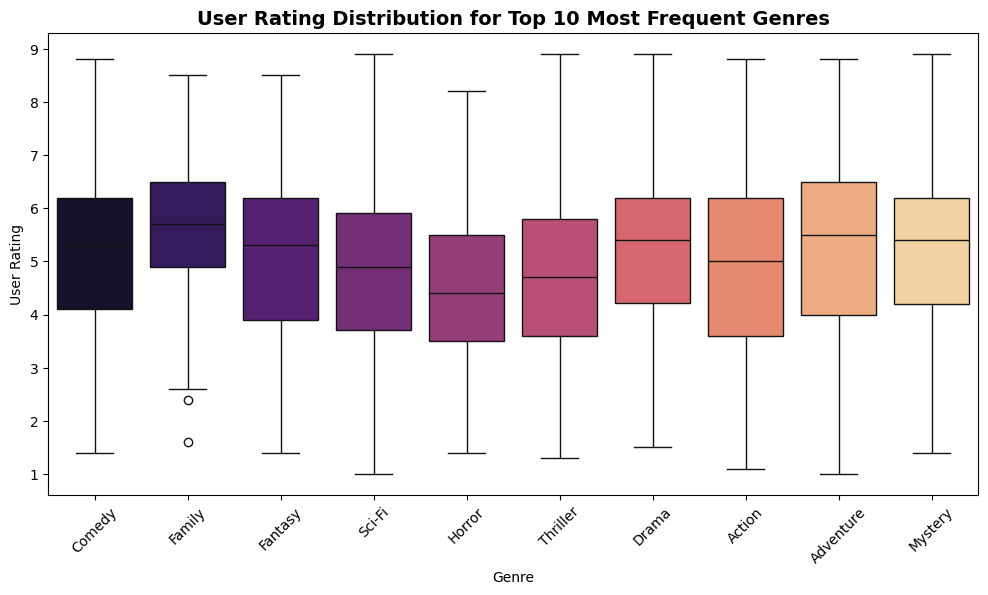

In [242]:
# "Explode" the genres in various lines
all_genres = imdb_finaldt['Genres'].str.split(', ').explode()

# DataFrame with genre and User Rating
df_genres = pd.DataFrame({
    'Genre': all_genres,
    'User Rating': imdb_finaldt.loc[all_genres.index, 'User Rating']
})

top10_genres = df_genres['Genre'].value_counts().nlargest(10).index
df_top10 = df_genres[df_genres['Genre'].isin(top10_genres)]

# Plot 
plt.figure(figsize=(12,6))
sns.boxplot(x='Genre', y='User Rating', data=df_top10, palette='magma')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('User Rating')
plt.title('User Rating Distribution for Top 10 Most Frequent Genres', fontsize=14, fontweight='bold')
plt.show()

##### Relationship Genres Rating and Critic Rating

C:\Users\KAWAN\AppData\Local\Temp\ipykernel_5740\817382122.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genre', y='Critic Rating', data=df_top10, palette='magma')


ValueError: cannot reindex on an axis with duplicate labels

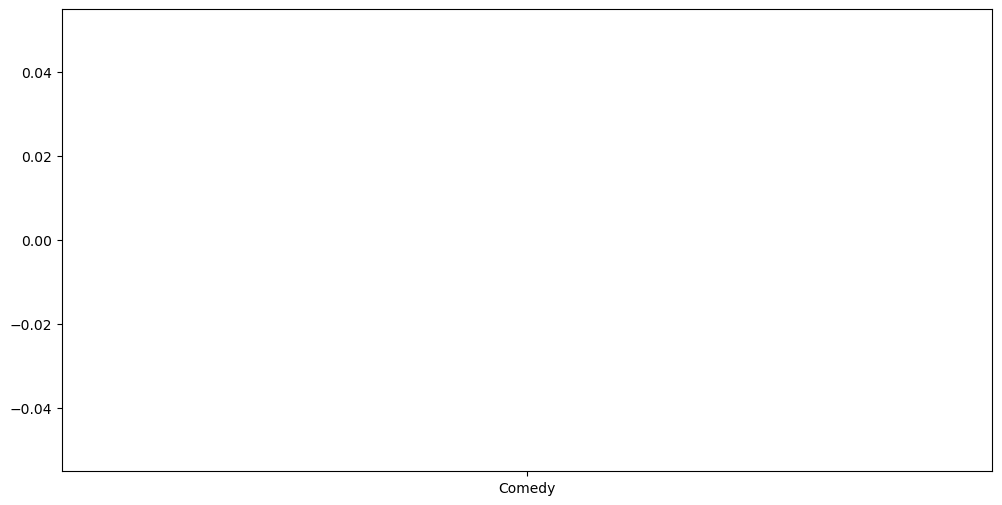

In [248]:
# "Explode" the genres in various lines
all_genres = imdb_finaldt['Genres'].str.split(', ').explode()

df_genres = pd.DataFrame({
    'Genre': all_genres,
    'Critic Rating': imdb_finaldt.loc[all_genres.index, 'Critic Rating']
})

top10_genres = df_genres['Genre'].value_counts().nlargest(10).index
df_top10 = df_genres[df_genres['Genre'].isin(top10_genres)]

# Plot 
plt.figure(figsize=(12,6))
sns.boxplot(x='Genre', y='Critic Rating', data=df_top10, palette='magma')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Critic Rating')
plt.title('Critic Rating Distribution for Top 10 Most Frequent Genres', fontsize=14, fontweight='bold')
plt.show()

##### Relationship between Popularity and Critic Rating

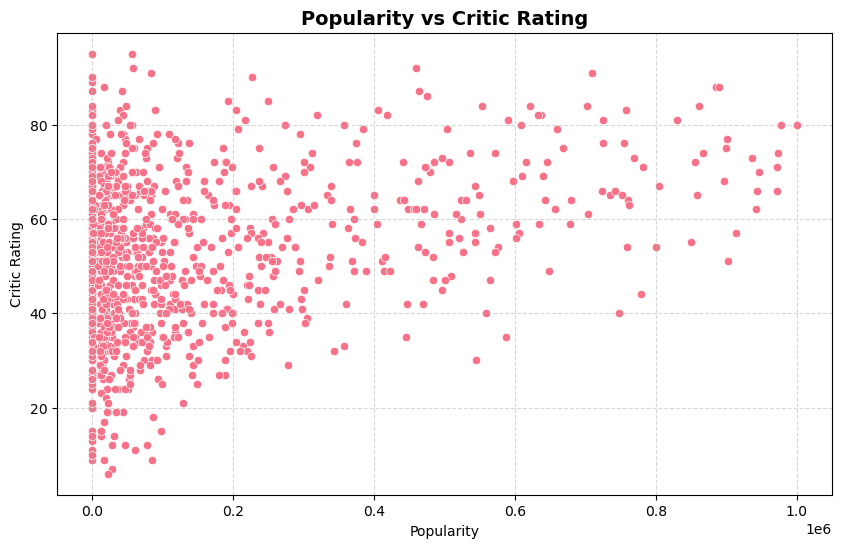

In [229]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Popularity', y='Critic Rating', data=imdb_finaldt)

plt.xlabel('Popularity')
plt.ylabel('Critic Rating')
plt.title('Popularity vs Critic Rating', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

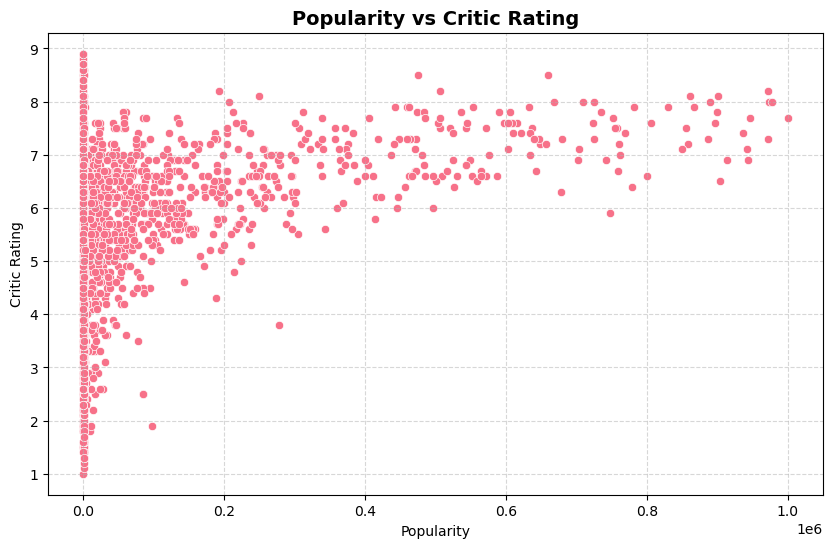

In [231]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Popularity', y='User Rating', data=imdb_finaldt)

plt.xlabel('Popularity')
plt.ylabel('Critic Rating')
plt.title('Popularity vs Critic Rating', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()